In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

读取照片

In [2]:
# 定义参数
# input_size = 28 # 输入图像大小
# num_classes = 2 # 标签的种类数
# num_epochs = 3 # 训练的循环周期
# batch_size = 7 # 一批次处理7张图片
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

# 数据增强
data_transforms = {
    'Train': transforms.Compose([
        # Can add more
        transforms.CenterCrop(224), # center crop 224*224 for resnet
        transforms.RandomHorizontalFlip(p=0.5), # Random horizontal rollover with a probability of 0.5
        transforms.RandomRotation(45), # turn -45°-45°
        transforms.ColorJitter(brightness=0.2, contrast=0.1, saturation=0.1, hue=0.1), # 亮度，对比度，饱和度，色相
        transforms.RandomGrayscale(p=0.025),
        transforms.ToTensor(), # Transfer to tensor
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # Treatment of mean and standard deviation
    ]),
    'Test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.RandomHorizontalFlip(p=0.5), # Random horizontal rollover with a probability of 0.5
        transforms.RandomRotation(45), # 随机旋转-45°到45°
        transforms.ColorJitter(brightness=0.2, contrast=0.1, saturation=0.1, hue=0.1), # 亮度，对比度，饱和度，色相
        transforms.RandomGrayscale(p=0.025),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ])
}
# 训练集
# 在这里改数据源文件夹
data_dir = "New Masks Dataset"
img_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['Train', 'Test']}
dataloaders = {x: torch.utils.data.DataLoader(img_datasets[x], batch_size=256,
                                              shuffle=True)
               for x in ['Train', 'Test']}
class_names = img_datasets['Train'].classes

In [3]:
for (x,y) in img_datasets["Train"]:
    print("___________________",x)
    print("||||||||||||||||||||", y)

___________________ tensor([[[-1.9295, -1.9295, -1.9295,  ..., -1.9295, -1.9295, -1.9295],
         [-1.9295, -1.9295, -1.9295,  ..., -1.9295, -1.9295, -1.9295],
         [-1.9295, -1.9295, -1.9295,  ..., -1.9295, -1.9295, -1.9295],
         ...,
         [-1.9295, -1.9295, -1.9295,  ..., -1.9295, -1.9295, -1.9295],
         [-1.9295, -1.9295, -1.9295,  ..., -1.9295, -1.9295, -1.9295],
         [-1.9295, -1.9295, -1.9295,  ..., -1.9295, -1.9295, -1.9295]],

        [[-1.8431, -1.8431, -1.8431,  ..., -1.8431, -1.8431, -1.8431],
         [-1.8431, -1.8431, -1.8431,  ..., -1.8431, -1.8431, -1.8431],
         [-1.8431, -1.8431, -1.8431,  ..., -1.8431, -1.8431, -1.8431],
         ...,
         [-1.8431, -1.8431, -1.8431,  ..., -1.8431, -1.8431, -1.8431],
         [-1.8431, -1.8431, -1.8431,  ..., -1.8431, -1.8431, -1.8431],
         [-1.8431, -1.8431, -1.8431,  ..., -1.8431, -1.8431, -1.8431]],

        [[-1.6127, -1.6127, -1.6127,  ..., -1.6127, -1.6127, -1.6127],
         [-1.6127, -1.612

___________________ tensor([[[-1.9980, -1.9980, -1.9980,  ..., -1.9980, -1.9980, -1.9980],
         [-1.9980, -1.9980, -1.9980,  ..., -1.9980, -1.9980, -1.9980],
         [-1.9980, -1.9980, -1.9980,  ..., -1.9980, -1.9980, -1.9980],
         ...,
         [-1.9980, -1.9980, -1.9980,  ..., -1.9980, -1.9980, -1.9980],
         [-1.9980, -1.9980, -1.9980,  ..., -1.9980, -1.9980, -1.9980],
         [-1.9980, -1.9980, -1.9980,  ..., -1.9980, -1.9980, -1.9980]],

        [[-1.9132, -1.9132, -1.9132,  ..., -1.9132, -1.9132, -1.9132],
         [-1.9132, -1.9132, -1.9132,  ..., -1.9132, -1.9132, -1.9132],
         [-1.9132, -1.9132, -1.9132,  ..., -1.9132, -1.9132, -1.9132],
         ...,
         [-1.9132, -1.9132, -1.9132,  ..., -1.9132, -1.9132, -1.9132],
         [-1.9132, -1.9132, -1.9132,  ..., -1.9132, -1.9132, -1.9132],
         [-1.9132, -1.9132, -1.9132,  ..., -1.9132, -1.9132, -1.9132]],

        [[-1.6824, -1.6824, -1.6824,  ..., -1.6824, -1.6824, -1.6824],
         [-1.6824, -1.682

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-1.9124, -1.9124, -1.9124,  ..., -1.9124, -1.9124, -1.9124],
         [-1.9124, -1.9124, -1.9124,  ..., -1.9124, -1.9124, -1.9124],
         [-1.9124, -1.9124, -1.9124,  ..., -1.9124, -1.9124, -1.9124],
         ...,
         [-1.9124, -1.9124, -1.9124,  ..., -1.9124, -1.9124, -1.9124],
         [-1.9124, -1.9124, -1.9124,  ..., -1.9124, -1.9124, -1.9124],
         [-1.9124, -1.9124, -1.9124,  ..., -1.9124, -1.9124, -1.9124]],

        [[-1.8256, -1.8256, -1.8256,  ..., -1.8256, -1.8256, -1.8256],
         [-1.8256, -1.8256, -1.8256,  ..., -1.8256, -1.8256, -1.8256],
         [-1.8256, -1.8256, -1.8256,  ..., -1.8256, -1.8256, -1.8256],
         ...,
         [-1.8256, -1.8256, -1.8256,  ..., -1.8256, -1.8256, -1.8256],
         [-1.8256, -1.8256, -1.8256,  ..., -1.8256, -1.8256, -1.8256],
         [-1.8256, -1.8256, -1.8256,  ..., -1.8256, -1.8256, -1.8256]],

        [[-1.5953, -1.5953, -1.5953,  ..., -1.5953, -1.5953, -1.5953],
         [-1.5953, -1.595

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-1.9124, -1.9124, -1.9124,  ..., -1.9124, -1.9124, -1.9124],
         [-1.9124, -1.9124, -1.9124,  ..., -1.9124, -1.9124, -1.9124],
         [-1.9124, -1.9124, -1.9124,  ..., -1.9124, -1.9124, -1.9124],
         ...,
         [-1.9124, -1.9124, -1.9124,  ..., -1.9124, -1.9124, -1.9124],
         [-1.9124, -1.9124, -1.9124,  ..., -1.9124, -1.9124, -1.9124],
         [-1.9124, -1.9124, -1.9124,  ..., -1.9124, -1.9124, -1.9124]],

        [[-1.8256, -1.8256, -1.8256,  ..., -1.8256, -1.8256, -1.8256],
         [-1.8256, -1.8256, -1.8256,  ..., -1.8256, -1.8256, -1.8256],
         [-1.8256, -1.8256, -1.8256,  ..., -1.8256, -1.8256, -1.8256],
         ...,
         [-1.8256, -1.8256, -1.8256,  ..., -1.8256, -1.8256, -1.8256],
         [-1.8256, -1.8256, -1.8256,  ..., -1.8256, -1.8256, -1.8256],
         [-1.8256, -1.8256, -1.8256,  ..., -1.8256, -1.8256, -1.8256]],

        [[-1.5953, -1.5953, -1.5953,  ..., -1.5953, -1.5953, -1.5953],
         [-1.5953, -1.595

___________________ tensor([[[-1.9295, -1.9295, -1.9295,  ..., -1.9295, -1.9295, -1.9295],
         [-1.9295, -1.9295, -1.9295,  ..., -1.9295, -1.9295, -1.9295],
         [-1.9295, -1.9295, -1.9295,  ..., -1.9295, -1.9295, -1.9295],
         ...,
         [-1.9295, -1.9295, -1.9295,  ..., -1.9295, -1.9295, -1.9295],
         [-1.9295, -1.9295, -1.9295,  ..., -1.9295, -1.9295, -1.9295],
         [-1.9295, -1.9295, -1.9295,  ..., -1.9295, -1.9295, -1.9295]],

        [[-1.8431, -1.8431, -1.8431,  ..., -1.8431, -1.8431, -1.8431],
         [-1.8431, -1.8431, -1.8431,  ..., -1.8431, -1.8431, -1.8431],
         [-1.8431, -1.8431, -1.8431,  ..., -1.8431, -1.8431, -1.8431],
         ...,
         [-1.8431, -1.8431, -1.8431,  ..., -1.8431, -1.8431, -1.8431],
         [-1.8431, -1.8431, -1.8431,  ..., -1.8431, -1.8431, -1.8431],
         [-1.8431, -1.8431, -1.8431,  ..., -1.8431, -1.8431, -1.8431]],

        [[-1.6127, -1.6127, -1.6127,  ..., -1.6127, -1.6127, -1.6127],
         [-1.6127, -1.612

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-1.9980, -1.9980, -1.9980,  ..., -1.9980, -1.9980, -1.9980],
         [-1.9980, -1.9980, -1.9980,  ..., -1.9980, -1.9980, -1.9980],
         [-1.9980, -1.9980, -1.9980,  ..., -1.9980, -1.9980, -1.9980],
         ...,
         [-1.9980, -1.9980, -1.9980,  ..., -1.9980, -1.9980, -1.9980],
         [-1.9980, -1.9980, -1.9980,  ..., -1.9980, -1.9980, -1.9980],
         [-1.9980, -1.9980, -1.9980,  ..., -1.9980, -1.9980, -1.9980]],

        [[-1.9132, -1.9132, -1.9132,  ..., -1.9132, -1.9132, -1.9132],
         [-1.9132, -1.9132, -1.9132,  ..., -1.9132, -1.9132, -1.9132],
         [-1.9132, -1.9132, -1.9132,  ..., -1.9132, -1.9132, -1.9132],
         ...,
         [-1.9132, -1.9132, -1.9132,  ..., -1.9132, -1.9132, -1.9132],
         [-1.9132, -1.9132, -1.9132,  ..., -1.9132, -1.9132, -1.9132],
         [-1.9132, -1.9132, -1.9132,  ..., -1.9132, -1.9132, -1.9132]],

        [[-1.6824, -1.6824, -1.6824,  ..., -1.6824, -1.6824, -1.6824],
         [-1.6824, -1.682

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.0494, -2.0494, -2.0494,  ..., -2.0494, -2.0494, -2.0494],
         [-2.0494, -2.0494, -2.0494,  ..., -2.0494, -2.0494, -2.0494],
         [-2.0494, -2.0494, -2.0494,  ..., -2.0494, -2.0494, -2.0494],
         ...,
         [-2.0494, -2.0494, -2.0494,  ..., -2.0494, -2.0494, -2.0494],
         [-2.0494, -2.0494, -2.0494,  ..., -2.0494, -2.0494, -2.0494],
         [-2.0494, -2.0494, -2.0494,  ..., -2.0494, -2.0494, -2.0494]],

        [[-1.9657, -1.9657, -1.9657,  ..., -1.9657, -1.9657, -1.9657],
         [-1.9657, -1.9657, -1.9657,  ..., -1.9657, -1.9657, -1.9657],
         [-1.9657, -1.9657, -1.9657,  ..., -1.9657, -1.9657, -1.9657],
         ...,
         [-1.9657, -1.9657, -1.9657,  ..., -1.9657, -1.9657, -1.9657],
         [-1.9657, -1.9657, -1.9657,  ..., -1.9657, -1.9657, -1.9657],
         [-1.9657, -1.9657, -1.9657,  ..., -1.9657, -1.9657, -1.9657]],

        [[-1.7347, -1.7347, -1.7347,  ..., -1.7347, -1.7347, -1.7347],
         [-1.7347, -1.734

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-1.9467, -1.9467, -1.9467,  ..., -1.9467, -1.9467, -1.9467],
         [-1.9467, -1.9467, -1.9467,  ..., -1.9467, -1.9467, -1.9467],
         [-1.9467, -1.9467, -1.9467,  ..., -1.9467, -1.9467, -1.9467],
         ...,
         [-1.9467, -1.9467, -1.9467,  ..., -1.9467, -1.9467, -1.9467],
         [-1.9467, -1.9467, -1.9467,  ..., -1.9467, -1.9467, -1.9467],
         [-1.9467, -1.9467, -1.9467,  ..., -1.9467, -1.9467, -1.9467]],

        [[-1.8606, -1.8606, -1.8606,  ..., -1.8606, -1.8606, -1.8606],
         [-1.8606, -1.8606, -1.8606,  ..., -1.8606, -1.8606, -1.8606],
         [-1.8606, -1.8606, -1.8606,  ..., -1.8606, -1.8606, -1.8606],
         ...,
         [-1.8606, -1.8606, -1.8606,  ..., -1.8606, -1.8606, -1.8606],
         [-1.8606, -1.8606, -1.8606,  ..., -1.8606, -1.8606, -1.8606],
         [-1.8606, -1.8606, -1.8606,  ..., -1.8606, -1.8606, -1.8606]],

        [[-1.6302, -1.6302, -1.6302,  ..., -1.6302, -1.6302, -1.6302],
         [-1.6302, -1.630

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ...,  1.0502,  1.0159, -2.1179],
         [ 1.0159,  0.9817,  0.9817,  ...,  0.9988,  0.9817, -2.1179],
         [ 1.0159,  0.9817,  0.9646,  ...,  0.9646,  0.9474, -2.1179],
         ...,
         [-2.1179,  1.5468,  1.5468,  ...,  1.5468,  1.5468,  1.5468],
         [-2.1179,  1.5468,  1.5468,  ...,  1.5468,  1.5468,  1.5468],
         [-2.1179,  1.5468,  1.5468,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ...,  0.6779,  0.6604, -2.0357],
         [ 0.2577,  0.1527,  0.1176,  ...,  0.6604,  0.6604, -2.0357],
         [ 0.2577,  0.1702,  0.1702,  ...,  0.6429,  0.6429, -2.0357],
         ...,
         [-2.0357,  1.7983,  1.7983,  ...,  1.7983,  1.7983,  1.7983],
         [-2.0357,  1.7983,  1.7983,  ...,  1.7983,  1.7983,  1.7983],
         [-2.0357,  1.7983,  1.7983,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ...,  1.1411,  1.1759, -1.8044],
         [ 0.7925,  0.653

___________________ tensor([[[-1.8953, -1.8953, -1.8953,  ..., -1.8953, -1.8953, -1.8953],
         [-1.8953, -1.8953, -1.8953,  ..., -1.8953, -1.8953, -1.8953],
         [-1.8953, -1.8953, -1.8953,  ..., -1.8953, -1.8953, -1.8953],
         ...,
         [-1.8953, -1.8953, -1.8953,  ..., -1.8953, -1.8953, -1.8953],
         [-1.8953, -1.8953, -1.8953,  ..., -1.8953, -1.8953, -1.8953],
         [-1.8953, -1.8953, -1.8953,  ..., -1.8953, -1.8953, -1.8953]],

        [[-1.8081, -1.8081, -1.8081,  ..., -1.8081, -1.8081, -1.8081],
         [-1.8081, -1.8081, -1.8081,  ..., -1.8081, -1.8081, -1.8081],
         [-1.8081, -1.8081, -1.8081,  ..., -1.8081, -1.8081, -1.8081],
         ...,
         [-1.8081, -1.8081, -1.8081,  ..., -1.8081, -1.8081, -1.8081],
         [-1.8081, -1.8081, -1.8081,  ..., -1.8081, -1.8081, -1.8081],
         [-1.8081, -1.8081, -1.8081,  ..., -1.8081, -1.8081, -1.8081]],

        [[-1.5779, -1.5779, -1.5779,  ..., -1.5779, -1.5779, -1.5779],
         [-1.5779, -1.577

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-1.9638, -1.9638, -1.9638,  ..., -1.9638, -1.9638, -1.9638],
         [-1.9638, -1.9638, -1.9638,  ..., -1.9638, -1.9638, -1.9638],
         [-1.9638, -1.9638, -1.9638,  ..., -1.9638, -1.9638, -1.9638],
         ...,
         [-1.9638, -1.9638, -1.9638,  ..., -1.9638, -1.9638, -1.9638],
         [-1.9638, -1.9638, -1.9638,  ..., -1.9638, -1.9638, -1.9638],
         [-1.9638, -1.9638, -1.9638,  ..., -1.9638, -1.9638, -1.9638]],

        [[-1.8782, -1.8782, -1.8782,  ..., -1.8782, -1.8782, -1.8782],
         [-1.8782, -1.8782, -1.8782,  ..., -1.8782, -1.8782, -1.8782],
         [-1.8782, -1.8782, -1.8782,  ..., -1.8782, -1.8782, -1.8782],
         ...,
         [-1.8782, -1.8782, -1.8782,  ..., -1.8782, -1.8782, -1.8782],
         [-1.8782, -1.8782, -1.8782,  ..., -1.8782, -1.8782, -1.8782],
         [-1.8782, -1.8782, -1.8782,  ..., -1.8782, -1.8782, -1.8782]],

        [[-1.6476, -1.6476, -1.6476,  ..., -1.6476, -1.6476, -1.6476],
         [-1.6476, -1.647

___________________ tensor([[[-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152],
         [-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152],
         [-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152],
         ...,
         [-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152],
         [-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152],
         [-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152]],

        [[-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307],
         [-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307],
         [-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307],
         ...,
         [-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307],
         [-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307],
         [-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307]],

        [[-1.6999, -1.6999, -1.6999,  ..., -1.6999, -1.6999, -1.6999],
         [-1.6999, -1.699

___________________ tensor([[[-1.9809, -1.9809, -1.9809,  ..., -1.9809, -1.9809, -1.9809],
         [-1.9809, -1.9809, -1.9809,  ..., -1.9809, -1.9809, -1.9809],
         [-1.9809, -1.9809, -1.9809,  ..., -1.9809, -1.9809, -1.9809],
         ...,
         [-1.9809, -1.9809, -1.9809,  ..., -1.9809, -1.9809, -1.9809],
         [-1.9809, -1.9809, -1.9809,  ..., -1.9809, -1.9809, -1.9809],
         [-1.9809, -1.9809, -1.9809,  ..., -1.9809, -1.9809, -1.9809]],

        [[-1.8957, -1.8957, -1.8957,  ..., -1.8957, -1.8957, -1.8957],
         [-1.8957, -1.8957, -1.8957,  ..., -1.8957, -1.8957, -1.8957],
         [-1.8957, -1.8957, -1.8957,  ..., -1.8957, -1.8957, -1.8957],
         ...,
         [-1.8957, -1.8957, -1.8957,  ..., -1.8957, -1.8957, -1.8957],
         [-1.8957, -1.8957, -1.8957,  ..., -1.8957, -1.8957, -1.8957],
         [-1.8957, -1.8957, -1.8957,  ..., -1.8957, -1.8957, -1.8957]],

        [[-1.6650, -1.6650, -1.6650,  ..., -1.6650, -1.6650, -1.6650],
         [-1.6650, -1.665

___________________ tensor([[[-2.1179, -2.1179,  0.6734,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179,  0.6049,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179,  0.4166,  ...,  1.4783,  1.3927,  1.3242],
         ...,
         [ 2.2489,  2.2489,  2.2489,  ...,  2.2489, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ...,  2.2489, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ...,  2.2489, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -0.2325,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -0.2500,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -0.4076,  ...,  0.4328,  0.4153,  0.3277],
         ...,
         [ 2.4286,  2.4286,  2.4286,  ...,  2.4286, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ...,  2.4286, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ...,  2.4286, -2.0357, -2.0357]],

        [[-1.8044, -1.8044,  0.1651,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-1.9295, -1.9295, -1.9295,  ..., -1.9295, -1.9295, -1.9295],
         [-1.9295, -1.9295, -1.9295,  ..., -1.9295, -1.9295, -1.9295],
         [-1.9295, -1.9295, -1.9295,  ..., -1.9295, -1.9295, -1.9295],
         ...,
         [-1.9295, -1.9295, -1.9295,  ..., -1.9295, -1.9295, -1.9295],
         [-1.9295, -1.9295, -1.9295,  ..., -1.9295, -1.9295, -1.9295],
         [-1.9295, -1.9295, -1.9295,  ..., -1.9295, -1.9295, -1.9295]],

        [[-1.8431, -1.8431, -1.8431,  ..., -1.8431, -1.8431, -1.8431],
         [-1.8431, -1.8431, -1.8431,  ..., -1.8431, -1.8431, -1.8431],
         [-1.8431, -1.8431, -1.8431,  ..., -1.8431, -1.8431, -1.8431],
         ...,
         [-1.8431, -1.8431, -1.8431,  ..., -1.8431, -1.8431, -1.8431],
         [-1.8431, -1.8431, -1.8431,  ..., -1.8431, -1.8431, -1.8431],
         [-1.8431, -1.8431, -1.8431,  ..., -1.8431, -1.8431, -1.8431]],

        [[-1.6127, -1.6127, -1.6127,  ..., -1.6127, -1.6127, -1.6127],
         [-1.6127, -1.612

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.1179, -2.1179,  1.0159,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179,  1.0159,  0.9817,  ...,  1.0159,  1.0502, -2.1179],
         [-2.1179,  1.0159,  0.9988,  ...,  1.0331,  1.0844,  1.0844],
         ...,
         [ 1.3927,  1.3927,  1.3927,  ...,  1.3927,  1.3927, -2.1179],
         [-2.1179,  1.3927,  1.3927,  ...,  1.3927,  1.3927, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ...,  1.3927, -2.1179, -2.1179]],

        [[-2.0357, -2.0357,  0.3978,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357,  0.3452,  0.3627,  ...,  0.4153,  0.4678, -2.0357],
         [-2.0357,  0.2752,  0.2752,  ...,  0.4153,  0.4853,  0.5028],
         ...,
         [ 1.5882,  1.5882,  1.5882,  ...,  1.5882,  1.5882, -2.0357],
         [-2.0357,  1.5882,  1.5882,  ...,  1.5882,  1.5882, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ...,  1.5882, -2.0357, -2.0357]],

        [[-1.8044, -1.8044,  0.3219,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044,  0.269

___________________ tensor([[[-2.1008, -2.1008, -2.1008,  ..., -2.1008, -2.1008, -2.1008],
         [-2.1008, -2.1008, -2.1008,  ..., -2.1008, -2.1008, -2.1008],
         [-2.1008, -2.1008, -2.1008,  ..., -2.1008, -2.1008, -2.1008],
         ...,
         [-2.1008, -2.1008, -2.1008,  ..., -2.1008, -2.1008, -2.1008],
         [-2.1008, -2.1008, -2.1008,  ..., -2.1008, -2.1008, -2.1008],
         [-2.1008, -2.1008, -2.1008,  ..., -2.1008, -2.1008, -2.1008]],

        [[-2.0182, -2.0182, -2.0182,  ..., -2.0182, -2.0182, -2.0182],
         [-2.0182, -2.0182, -2.0182,  ..., -2.0182, -2.0182, -2.0182],
         [-2.0182, -2.0182, -2.0182,  ..., -2.0182, -2.0182, -2.0182],
         ...,
         [-2.0182, -2.0182, -2.0182,  ..., -2.0182, -2.0182, -2.0182],
         [-2.0182, -2.0182, -2.0182,  ..., -2.0182, -2.0182, -2.0182],
         [-2.0182, -2.0182, -2.0182,  ..., -2.0182, -2.0182, -2.0182]],

        [[-1.7870, -1.7870, -1.7870,  ..., -1.7870, -1.7870, -1.7870],
         [-1.7870, -1.787

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-1.9295, -1.9295, -1.9295,  ..., -1.9295, -1.9295, -1.9295],
         [-1.9295, -1.9295, -1.9295,  ..., -1.9295, -1.9295, -1.9295],
         [-1.9295, -1.9295, -1.9295,  ..., -1.9295, -1.9295, -1.9295],
         ...,
         [-1.9295, -1.9295, -1.9295,  ..., -1.9295, -1.9295, -1.9295],
         [-1.9295, -1.9295, -1.9295,  ..., -1.9295, -1.9295, -1.9295],
         [-1.9295, -1.9295, -1.9295,  ..., -1.9295, -1.9295, -1.9295]],

        [[-1.8431, -1.8431, -1.8431,  ..., -1.8431, -1.8431, -1.8431],
         [-1.8431, -1.8431, -1.8431,  ..., -1.8431, -1.8431, -1.8431],
         [-1.8431, -1.8431, -1.8431,  ..., -1.8431, -1.8431, -1.8431],
         ...,
         [-1.8431, -1.8431, -1.8431,  ..., -1.8431, -1.8431, -1.8431],
         [-1.8431, -1.8431, -1.8431,  ..., -1.8431, -1.8431, -1.8431],
         [-1.8431, -1.8431, -1.8431,  ..., -1.8431, -1.8431, -1.8431]],

        [[-1.6127, -1.6127, -1.6127,  ..., -1.6127, -1.6127, -1.6127],
         [-1.6127, -1.612

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.0665, -2.0665, -2.0665,  ..., -2.0665, -2.0665, -2.0665],
         [-2.0665, -2.0665, -2.0665,  ..., -2.0665, -2.0665, -2.0665],
         [-2.0665, -2.0665, -2.0665,  ..., -2.0665, -2.0665, -2.0665],
         ...,
         [-2.0665, -2.0665, -2.0665,  ..., -2.0665, -2.0665, -2.0665],
         [-2.0665, -2.0665, -2.0665,  ..., -2.0665, -2.0665, -2.0665],
         [-2.0665, -2.0665, -2.0665,  ..., -2.0665, -2.0665, -2.0665]],

        [[-1.9832, -1.9832, -1.9832,  ..., -1.9832, -1.9832, -1.9832],
         [-1.9832, -1.9832, -1.9832,  ..., -1.9832, -1.9832, -1.9832],
         [-1.9832, -1.9832, -1.9832,  ..., -1.9832, -1.9832, -1.9832],
         ...,
         [-1.9832, -1.9832, -1.9832,  ..., -1.9832, -1.9832, -1.9832],
         [-1.9832, -1.9832, -1.9832,  ..., -1.9832, -1.9832, -1.9832],
         [-1.9832, -1.9832, -1.9832,  ..., -1.9832, -1.9832, -1.9832]],

        [[-1.7522, -1.7522, -1.7522,  ..., -1.7522, -1.7522, -1.7522],
         [-1.7522, -1.752

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-1.9809, -1.9809, -1.9809,  ..., -1.9809, -1.9809, -1.9809],
         [-1.9809, -1.9809, -1.9809,  ..., -1.9809, -1.9809, -1.9809],
         [-1.9809, -1.9809, -1.9809,  ..., -1.9809, -1.9809, -1.9809],
         ...,
         [-1.9809, -1.9809, -1.9809,  ..., -1.9809, -1.9809, -1.9809],
         [-1.9809, -1.9809, -1.9809,  ..., -1.9809, -1.9809, -1.9809],
         [-1.9809, -1.9809, -1.9809,  ..., -1.9809, -1.9809, -1.9809]],

        [[-1.8957, -1.8957, -1.8957,  ..., -1.8957, -1.8957, -1.8957],
         [-1.8957, -1.8957, -1.8957,  ..., -1.8957, -1.8957, -1.8957],
         [-1.8957, -1.8957, -1.8957,  ..., -1.8957, -1.8957, -1.8957],
         ...,
         [-1.8957, -1.8957, -1.8957,  ..., -1.8957, -1.8957, -1.8957],
         [-1.8957, -1.8957, -1.8957,  ..., -1.8957, -1.8957, -1.8957],
         [-1.8957, -1.8957, -1.8957,  ..., -1.8957, -1.8957, -1.8957]],

        [[-1.6650, -1.6650, -1.6650,  ..., -1.6650, -1.6650, -1.6650],
         [-1.6650, -1.665

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152],
         [-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152],
         [-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152],
         ...,
         [-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152],
         [-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152],
         [-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152]],

        [[-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307],
         [-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307],
         [-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307],
         ...,
         [-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307],
         [-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307],
         [-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307]],

        [[-1.6999, -1.6999, -1.6999,  ..., -1.6999, -1.6999, -1.6999],
         [-1.6999, -1.699

___________________ tensor([[[-1.8953, -1.8953, -1.8953,  ..., -1.8953, -1.8953, -1.8953],
         [-1.8953, -1.8953, -1.8953,  ..., -1.8953, -1.8953, -1.8953],
         [-1.8953, -1.8953, -1.8953,  ..., -1.8953, -1.8953, -1.8953],
         ...,
         [-1.8953, -1.8953, -1.8953,  ..., -1.8953, -1.8953, -1.8953],
         [-1.8953, -1.8953, -1.8953,  ..., -1.8953, -1.8953, -1.8953],
         [-1.8953, -1.8953, -1.8953,  ..., -1.8953, -1.8953, -1.8953]],

        [[-1.8081, -1.8081, -1.8081,  ..., -1.8081, -1.8081, -1.8081],
         [-1.8081, -1.8081, -1.8081,  ..., -1.8081, -1.8081, -1.8081],
         [-1.8081, -1.8081, -1.8081,  ..., -1.8081, -1.8081, -1.8081],
         ...,
         [-1.8081, -1.8081, -1.8081,  ..., -1.8081, -1.8081, -1.8081],
         [-1.8081, -1.8081, -1.8081,  ..., -1.8081, -1.8081, -1.8081],
         [-1.8081, -1.8081, -1.8081,  ..., -1.8081, -1.8081, -1.8081]],

        [[-1.5779, -1.5779, -1.5779,  ..., -1.5779, -1.5779, -1.5779],
         [-1.5779, -1.577

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-1.8610, -1.8610, -1.8610,  ..., -1.8610, -1.8610, -1.8610],
         [-1.8610, -1.8610, -1.8610,  ..., -1.8610, -1.8610, -1.8610],
         [-1.8610, -1.8610, -1.8610,  ..., -1.8610, -1.8610, -1.8610],
         ...,
         [-1.8610, -1.8610, -1.8610,  ..., -1.8610, -1.8610, -1.8610],
         [-1.8610, -1.8610, -1.8610,  ..., -1.8610, -1.8610, -1.8610],
         [-1.8610, -1.8610, -1.8610,  ..., -1.8610, -1.8610, -1.8610]],

        [[-1.7731, -1.7731, -1.7731,  ..., -1.7731, -1.7731, -1.7731],
         [-1.7731, -1.7731, -1.7731,  ..., -1.7731, -1.7731, -1.7731],
         [-1.7731, -1.7731, -1.7731,  ..., -1.7731, -1.7731, -1.7731],
         ...,
         [-1.7731, -1.7731, -1.7731,  ..., -1.7731, -1.7731, -1.7731],
         [-1.7731, -1.7731, -1.7731,  ..., -1.7731, -1.7731, -1.7731],
         [-1.7731, -1.7731, -1.7731,  ..., -1.7731, -1.7731, -1.7731]],

        [[-1.5430, -1.5430, -1.5430,  ..., -1.5430, -1.5430, -1.5430],
         [-1.5430, -1.543

___________________ tensor([[[-2.0837, -2.0837, -2.0837,  ..., -2.0837, -2.0837, -2.0837],
         [-2.0837, -2.0837, -2.0837,  ..., -2.0837, -2.0837, -2.0837],
         [-2.0837, -2.0837, -2.0837,  ..., -2.0837, -2.0837, -2.0837],
         ...,
         [-2.0837, -2.0837, -2.0837,  ..., -2.0837, -2.0837, -2.0837],
         [-2.0837, -2.0837, -2.0837,  ..., -2.0837, -2.0837, -2.0837],
         [-2.0837, -2.0837, -2.0837,  ..., -2.0837, -2.0837, -2.0837]],

        [[-2.0007, -2.0007, -2.0007,  ..., -2.0007, -2.0007, -2.0007],
         [-2.0007, -2.0007, -2.0007,  ..., -2.0007, -2.0007, -2.0007],
         [-2.0007, -2.0007, -2.0007,  ..., -2.0007, -2.0007, -2.0007],
         ...,
         [-2.0007, -2.0007, -2.0007,  ..., -2.0007, -2.0007, -2.0007],
         [-2.0007, -2.0007, -2.0007,  ..., -2.0007, -2.0007, -2.0007],
         [-2.0007, -2.0007, -2.0007,  ..., -2.0007, -2.0007, -2.0007]],

        [[-1.7696, -1.7696, -1.7696,  ..., -1.7696, -1.7696, -1.7696],
         [-1.7696, -1.769

___________________ tensor([[[-2.0837, -2.0837, -2.0837,  ..., -2.0837, -2.0837, -2.0837],
         [-2.0837, -2.0837, -2.0837,  ..., -2.0837, -2.0837, -2.0837],
         [-2.0837, -2.0837, -2.0837,  ..., -2.0837, -2.0837, -2.0837],
         ...,
         [-2.0837, -2.0837, -2.0837,  ..., -2.0837, -2.0837, -2.0837],
         [-2.0837, -2.0837, -2.0837,  ..., -2.0837, -2.0837, -2.0837],
         [-2.0837, -2.0837, -2.0837,  ..., -2.0837, -2.0837, -2.0837]],

        [[-2.0007, -2.0007, -2.0007,  ..., -2.0007, -2.0007, -2.0007],
         [-2.0007, -2.0007, -2.0007,  ..., -2.0007, -2.0007, -2.0007],
         [-2.0007, -2.0007, -2.0007,  ..., -2.0007, -2.0007, -2.0007],
         ...,
         [-2.0007, -2.0007, -2.0007,  ..., -2.0007, -2.0007, -2.0007],
         [-2.0007, -2.0007, -2.0007,  ..., -2.0007, -2.0007, -2.0007],
         [-2.0007, -2.0007, -2.0007,  ..., -2.0007, -2.0007, -2.0007]],

        [[-1.7696, -1.7696, -1.7696,  ..., -1.7696, -1.7696, -1.7696],
         [-1.7696, -1.769

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-1.9638, -1.9638, -1.9638,  ..., -1.9638, -1.9638, -1.9638],
         [-1.9638, -1.9638, -1.9638,  ..., -1.9638, -1.9638, -1.9638],
         [-1.9638, -1.9638, -1.9638,  ..., -1.9638, -1.9638, -1.9638],
         ...,
         [-1.9638, -1.9638, -1.9638,  ..., -1.9638, -1.9638, -1.9638],
         [-1.9638, -1.9638, -1.9638,  ..., -1.9638, -1.9638, -1.9638],
         [-1.9638, -1.9638, -1.9638,  ..., -1.9638, -1.9638, -1.9638]],

        [[-1.8782, -1.8782, -1.8782,  ..., -1.8782, -1.8782, -1.8782],
         [-1.8782, -1.8782, -1.8782,  ..., -1.8782, -1.8782, -1.8782],
         [-1.8782, -1.8782, -1.8782,  ..., -1.8782, -1.8782, -1.8782],
         ...,
         [-1.8782, -1.8782, -1.8782,  ..., -1.8782, -1.8782, -1.8782],
         [-1.8782, -1.8782, -1.8782,  ..., -1.8782, -1.8782, -1.8782],
         [-1.8782, -1.8782, -1.8782,  ..., -1.8782, -1.8782, -1.8782]],

        [[-1.6476, -1.6476, -1.6476,  ..., -1.6476, -1.6476, -1.6476],
         [-1.6476, -1.647

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.0323, -2.0323, -2.0323,  ..., -2.0323, -2.0323, -2.0323],
         [-2.0323, -2.0323, -2.0323,  ..., -2.0323, -2.0323, -2.0323],
         [-2.0323, -2.0323, -2.0323,  ..., -2.0323, -2.0323, -2.0323],
         ...,
         [-2.0323, -2.0323, -2.0323,  ..., -2.0323, -2.0323, -2.0323],
         [-2.0323, -2.0323, -2.0323,  ..., -2.0323, -2.0323, -2.0323],
         [-2.0323, -2.0323, -2.0323,  ..., -2.0323, -2.0323, -2.0323]],

        [[-1.9482, -1.9482, -1.9482,  ..., -1.9482, -1.9482, -1.9482],
         [-1.9482, -1.9482, -1.9482,  ..., -1.9482, -1.9482, -1.9482],
         [-1.9482, -1.9482, -1.9482,  ..., -1.9482, -1.9482, -1.9482],
         ...,
         [-1.9482, -1.9482, -1.9482,  ..., -1.9482, -1.9482, -1.9482],
         [-1.9482, -1.9482, -1.9482,  ..., -1.9482, -1.9482, -1.9482],
         [-1.9482, -1.9482, -1.9482,  ..., -1.9482, -1.9482, -1.9482]],

        [[-1.7173, -1.7173, -1.7173,  ..., -1.7173, -1.7173, -1.7173],
         [-1.7173, -1.717

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-1.9295, -1.9295, -1.9295,  ..., -1.9295, -1.9295, -1.9295],
         [-1.9295, -1.9295, -1.9295,  ..., -1.9295, -1.9295, -1.9295],
         [-1.9295, -1.9295, -1.9295,  ..., -1.9295, -1.9295, -1.9295],
         ...,
         [-1.9295, -1.9295, -1.9295,  ..., -1.9295, -1.9295, -1.9295],
         [-1.9295, -1.9295, -1.9295,  ..., -1.9295, -1.9295, -1.9295],
         [-1.9295, -1.9295, -1.9295,  ..., -1.9295, -1.9295, -1.9295]],

        [[-1.8431, -1.8431, -1.8431,  ..., -1.8431, -1.8431, -1.8431],
         [-1.8431, -1.8431, -1.8431,  ..., -1.8431, -1.8431, -1.8431],
         [-1.8431, -1.8431, -1.8431,  ..., -1.8431, -1.8431, -1.8431],
         ...,
         [-1.8431, -1.8431, -1.8431,  ..., -1.8431, -1.8431, -1.8431],
         [-1.8431, -1.8431, -1.8431,  ..., -1.8431, -1.8431, -1.8431],
         [-1.8431, -1.8431, -1.8431,  ..., -1.8431, -1.8431, -1.8431]],

        [[-1.6127, -1.6127, -1.6127,  ..., -1.6127, -1.6127, -1.6127],
         [-1.6127, -1.612

___________________ tensor([[[-2.0837, -2.0837, -2.0837,  ..., -2.0837, -2.0837, -2.0837],
         [-2.0837, -2.0837, -2.0837,  ..., -2.0837, -2.0837, -2.0837],
         [-2.0837, -2.0837, -2.0837,  ..., -2.0837, -2.0837, -2.0837],
         ...,
         [-2.0837, -2.0837, -2.0837,  ..., -2.0837, -2.0837, -2.0837],
         [-2.0837, -2.0837, -2.0837,  ..., -2.0837, -2.0837, -2.0837],
         [-2.0837, -2.0837, -2.0837,  ..., -2.0837, -2.0837, -2.0837]],

        [[-2.0007, -2.0007, -2.0007,  ..., -2.0007, -2.0007, -2.0007],
         [-2.0007, -2.0007, -2.0007,  ..., -2.0007, -2.0007, -2.0007],
         [-2.0007, -2.0007, -2.0007,  ..., -2.0007, -2.0007, -2.0007],
         ...,
         [-2.0007, -2.0007, -2.0007,  ..., -2.0007, -2.0007, -2.0007],
         [-2.0007, -2.0007, -2.0007,  ..., -2.0007, -2.0007, -2.0007],
         [-2.0007, -2.0007, -2.0007,  ..., -2.0007, -2.0007, -2.0007]],

        [[-1.7696, -1.7696, -1.7696,  ..., -1.7696, -1.7696, -1.7696],
         [-1.7696, -1.769

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.0665, -2.0665, -2.0665,  ..., -2.0665, -2.0665, -2.0665],
         [-2.0665, -2.0665, -2.0665,  ..., -2.0665, -2.0665, -2.0665],
         [-2.0665, -2.0665, -2.0665,  ..., -2.0665, -2.0665, -2.0665],
         ...,
         [-2.0665, -2.0665, -2.0665,  ..., -2.0665, -2.0665, -2.0665],
         [-2.0665, -2.0665, -2.0665,  ..., -2.0665, -2.0665, -2.0665],
         [-2.0665, -2.0665, -2.0665,  ..., -2.0665, -2.0665, -2.0665]],

        [[-1.9832, -1.9832, -1.9832,  ..., -1.9832, -1.9832, -1.9832],
         [-1.9832, -1.9832, -1.9832,  ..., -1.9832, -1.9832, -1.9832],
         [-1.9832, -1.9832, -1.9832,  ..., -1.9832, -1.9832, -1.9832],
         ...,
         [-1.9832, -1.9832, -1.9832,  ..., -1.9832, -1.9832, -1.9832],
         [-1.9832, -1.9832, -1.9832,  ..., -1.9832, -1.9832, -1.9832],
         [-1.9832, -1.9832, -1.9832,  ..., -1.9832, -1.9832, -1.9832]],

        [[-1.7522, -1.7522, -1.7522,  ..., -1.7522, -1.7522, -1.7522],
         [-1.7522, -1.752

___________________ tensor([[[-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152],
         [-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152],
         [-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152],
         ...,
         [-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152],
         [-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152],
         [-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152]],

        [[-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307],
         [-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307],
         [-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307],
         ...,
         [-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307],
         [-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307],
         [-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307]],

        [[-1.6999, -1.6999, -1.6999,  ..., -1.6999, -1.6999, -1.6999],
         [-1.6999, -1.699

___________________ tensor([[[-2.0837, -2.0837, -2.0837,  ..., -2.0837, -2.0837, -2.0837],
         [-2.0837, -2.0837, -2.0837,  ..., -2.0837, -2.0837, -2.0837],
         [-2.0837, -2.0837, -2.0837,  ..., -2.0837, -2.0837, -2.0837],
         ...,
         [-2.0837, -2.0837, -2.0837,  ..., -2.0837, -2.0837, -2.0837],
         [-2.0837, -2.0837, -2.0837,  ..., -2.0837, -2.0837, -2.0837],
         [-2.0837, -2.0837, -2.0837,  ..., -2.0837, -2.0837, -2.0837]],

        [[-2.0007, -2.0007, -2.0007,  ..., -2.0007, -2.0007, -2.0007],
         [-2.0007, -2.0007, -2.0007,  ..., -2.0007, -2.0007, -2.0007],
         [-2.0007, -2.0007, -2.0007,  ..., -2.0007, -2.0007, -2.0007],
         ...,
         [-2.0007, -2.0007, -2.0007,  ..., -2.0007, -2.0007, -2.0007],
         [-2.0007, -2.0007, -2.0007,  ..., -2.0007, -2.0007, -2.0007],
         [-2.0007, -2.0007, -2.0007,  ..., -2.0007, -2.0007, -2.0007]],

        [[-1.7696, -1.7696, -1.7696,  ..., -1.7696, -1.7696, -1.7696],
         [-1.7696, -1.769

___________________ tensor([[[-1.9295, -1.9295, -1.9295,  ..., -1.9295, -1.9295, -1.9295],
         [-1.9295, -1.9295, -1.9295,  ..., -1.9295, -1.9295, -1.9295],
         [-1.9295, -1.9295, -1.9295,  ..., -1.9295, -1.9295, -1.9295],
         ...,
         [-1.9295, -1.9295, -1.9295,  ..., -1.9295, -1.9295, -1.9295],
         [-1.9295, -1.9295, -1.9295,  ..., -1.9295, -1.9295, -1.9295],
         [-1.9295, -1.9295, -1.9295,  ..., -1.9295, -1.9295, -1.9295]],

        [[-1.8431, -1.8431, -1.8431,  ..., -1.8431, -1.8431, -1.8431],
         [-1.8431, -1.8431, -1.8431,  ..., -1.8431, -1.8431, -1.8431],
         [-1.8431, -1.8431, -1.8431,  ..., -1.8431, -1.8431, -1.8431],
         ...,
         [-1.8431, -1.8431, -1.8431,  ..., -1.8431, -1.8431, -1.8431],
         [-1.8431, -1.8431, -1.8431,  ..., -1.8431, -1.8431, -1.8431],
         [-1.8431, -1.8431, -1.8431,  ..., -1.8431, -1.8431, -1.8431]],

        [[-1.6127, -1.6127, -1.6127,  ..., -1.6127, -1.6127, -1.6127],
         [-1.6127, -1.612

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-1.8782, -1.8782, -1.8782,  ..., -1.8782, -1.8782, -1.8782],
         [-1.8782, -1.8782, -1.8782,  ..., -1.8782, -1.8782, -1.8782],
         [-1.8782, -1.8782, -1.8782,  ..., -1.8782, -1.8782, -1.8782],
         ...,
         [-1.8782, -1.8782, -1.8782,  ..., -1.8782, -1.8782, -1.8782],
         [-1.8782, -1.8782, -1.8782,  ..., -1.8782, -1.8782, -1.8782],
         [-1.8782, -1.8782, -1.8782,  ..., -1.8782, -1.8782, -1.8782]],

        [[-1.7906, -1.7906, -1.7906,  ..., -1.7906, -1.7906, -1.7906],
         [-1.7906, -1.7906, -1.7906,  ..., -1.7906, -1.7906, -1.7906],
         [-1.7906, -1.7906, -1.7906,  ..., -1.7906, -1.7906, -1.7906],
         ...,
         [-1.7906, -1.7906, -1.7906,  ..., -1.7906, -1.7906, -1.7906],
         [-1.7906, -1.7906, -1.7906,  ..., -1.7906, -1.7906, -1.7906],
         [-1.7906, -1.7906, -1.7906,  ..., -1.7906, -1.7906, -1.7906]],

        [[-1.5604, -1.5604, -1.5604,  ..., -1.5604, -1.5604, -1.5604],
         [-1.5604, -1.560

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.0323, -2.0323, -2.0323,  ..., -2.0323, -2.0323, -2.0323],
         [-2.0323, -2.0323, -2.0323,  ..., -2.0323, -2.0323, -2.0323],
         [-2.0323, -2.0323, -2.0323,  ..., -2.0323, -2.0323, -2.0323],
         ...,
         [-2.0323, -2.0323, -2.0323,  ..., -2.0323, -2.0323, -2.0323],
         [-2.0323, -2.0323, -2.0323,  ..., -2.0323, -2.0323, -2.0323],
         [-2.0323, -2.0323, -2.0323,  ..., -2.0323, -2.0323, -2.0323]],

        [[-1.9482, -1.9482, -1.9482,  ..., -1.9482, -1.9482, -1.9482],
         [-1.9482, -1.9482, -1.9482,  ..., -1.9482, -1.9482, -1.9482],
         [-1.9482, -1.9482, -1.9482,  ..., -1.9482, -1.9482, -1.9482],
         ...,
         [-1.9482, -1.9482, -1.9482,  ..., -1.9482, -1.9482, -1.9482],
         [-1.9482, -1.9482, -1.9482,  ..., -1.9482, -1.9482, -1.9482],
         [-1.9482, -1.9482, -1.9482,  ..., -1.9482, -1.9482, -1.9482]],

        [[-1.7173, -1.7173, -1.7173,  ..., -1.7173, -1.7173, -1.7173],
         [-1.7173, -1.717

___________________ tensor([[[-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152],
         [-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152],
         [-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152],
         ...,
         [-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152],
         [-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152],
         [-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152]],

        [[-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307],
         [-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307],
         [-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307],
         ...,
         [-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307],
         [-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307],
         [-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307]],

        [[-1.6999, -1.6999, -1.6999,  ..., -1.6999, -1.6999, -1.6999],
         [-1.6999, -1.699

___________________ tensor([[[-2.0323, -2.0323, -2.0323,  ..., -2.0323, -2.0323, -2.0323],
         [-2.0323, -2.0323, -2.0323,  ..., -2.0323, -2.0323, -2.0323],
         [-2.0323, -2.0323, -2.0323,  ..., -2.0323, -2.0323, -2.0323],
         ...,
         [-2.0323, -2.0323, -2.0323,  ..., -2.0323, -2.0323, -2.0323],
         [-2.0323, -2.0323, -2.0323,  ..., -2.0323, -2.0323, -2.0323],
         [-2.0323, -2.0323, -2.0323,  ..., -2.0323, -2.0323, -2.0323]],

        [[-1.9482, -1.9482, -1.9482,  ..., -1.9482, -1.9482, -1.9482],
         [-1.9482, -1.9482, -1.9482,  ..., -1.9482, -1.9482, -1.9482],
         [-1.9482, -1.9482, -1.9482,  ..., -1.9482, -1.9482, -1.9482],
         ...,
         [-1.9482, -1.9482, -1.9482,  ..., -1.9482, -1.9482, -1.9482],
         [-1.9482, -1.9482, -1.9482,  ..., -1.9482, -1.9482, -1.9482],
         [-1.9482, -1.9482, -1.9482,  ..., -1.9482, -1.9482, -1.9482]],

        [[-1.7173, -1.7173, -1.7173,  ..., -1.7173, -1.7173, -1.7173],
         [-1.7173, -1.717

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-1.9295, -1.9295, -1.9295,  ..., -1.9295, -1.9295, -1.9295],
         [-1.9295, -1.9295, -1.9295,  ..., -1.9295, -1.9295, -1.9295],
         [-1.9295, -1.9295, -1.9295,  ..., -1.9295, -1.9295, -1.9295],
         ...,
         [-1.9295, -1.9295, -1.9295,  ..., -1.9295, -1.9295, -1.9295],
         [-1.9295, -1.9295, -1.9295,  ..., -1.9295, -1.9295, -1.9295],
         [-1.9295, -1.9295, -1.9295,  ..., -1.9295, -1.9295, -1.9295]],

        [[-1.8431, -1.8431, -1.8431,  ..., -1.8431, -1.8431, -1.8431],
         [-1.8431, -1.8431, -1.8431,  ..., -1.8431, -1.8431, -1.8431],
         [-1.8431, -1.8431, -1.8431,  ..., -1.8431, -1.8431, -1.8431],
         ...,
         [-1.8431, -1.8431, -1.8431,  ..., -1.8431, -1.8431, -1.8431],
         [-1.8431, -1.8431, -1.8431,  ..., -1.8431, -1.8431, -1.8431],
         [-1.8431, -1.8431, -1.8431,  ..., -1.8431, -1.8431, -1.8431]],

        [[-1.6127, -1.6127, -1.6127,  ..., -1.6127, -1.6127, -1.6127],
         [-1.6127, -1.612

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-1.9638, -1.9638, -1.9638,  ..., -1.9638, -1.9638, -1.9638],
         [-1.9638, -1.9638, -1.9638,  ..., -1.9638, -1.9638, -1.9638],
         [-1.9638, -1.9638, -1.9638,  ..., -1.9638, -1.9638, -1.9638],
         ...,
         [-1.9638, -1.9638, -1.9638,  ..., -1.9638, -1.9638, -1.9638],
         [-1.9638, -1.9638, -1.9638,  ..., -1.9638, -1.9638, -1.9638],
         [-1.9638, -1.9638, -1.9638,  ..., -1.9638, -1.9638, -1.9638]],

        [[-1.8782, -1.8782, -1.8782,  ..., -1.8782, -1.8782, -1.8782],
         [-1.8782, -1.8782, -1.8782,  ..., -1.8782, -1.8782, -1.8782],
         [-1.8782, -1.8782, -1.8782,  ..., -1.8782, -1.8782, -1.8782],
         ...,
         [-1.8782, -1.8782, -1.8782,  ..., -1.8782, -1.8782, -1.8782],
         [-1.8782, -1.8782, -1.8782,  ..., -1.8782, -1.8782, -1.8782],
         [-1.8782, -1.8782, -1.8782,  ..., -1.8782, -1.8782, -1.8782]],

        [[-1.6476, -1.6476, -1.6476,  ..., -1.6476, -1.6476, -1.6476],
         [-1.6476, -1.647

___________________ tensor([[[-2.0665, -2.0665, -2.0665,  ..., -2.0665, -2.0665, -2.0665],
         [-2.0665, -2.0665, -2.0665,  ..., -2.0665, -2.0665, -2.0665],
         [-2.0665, -2.0665, -2.0665,  ..., -2.0665, -2.0665, -2.0665],
         ...,
         [-2.0665, -2.0665, -2.0665,  ..., -2.0665, -2.0665, -2.0665],
         [-2.0665, -2.0665, -2.0665,  ..., -2.0665, -2.0665, -2.0665],
         [-2.0665, -2.0665, -2.0665,  ..., -2.0665, -2.0665, -2.0665]],

        [[-1.9832, -1.9832, -1.9832,  ..., -1.9832, -1.9832, -1.9832],
         [-1.9832, -1.9832, -1.9832,  ..., -1.9832, -1.9832, -1.9832],
         [-1.9832, -1.9832, -1.9832,  ..., -1.9832, -1.9832, -1.9832],
         ...,
         [-1.9832, -1.9832, -1.9832,  ..., -1.9832, -1.9832, -1.9832],
         [-1.9832, -1.9832, -1.9832,  ..., -1.9832, -1.9832, -1.9832],
         [-1.9832, -1.9832, -1.9832,  ..., -1.9832, -1.9832, -1.9832]],

        [[-1.7522, -1.7522, -1.7522,  ..., -1.7522, -1.7522, -1.7522],
         [-1.7522, -1.752

___________________ tensor([[[-1.9295, -1.9295, -1.9295,  ..., -1.9295, -1.9295, -1.9295],
         [-1.9295, -1.9295, -1.9295,  ..., -1.9295, -1.9295, -1.9295],
         [-1.9295, -1.9295, -1.9295,  ..., -1.9295, -1.9295, -1.9295],
         ...,
         [-1.9295, -1.9295, -1.9295,  ..., -1.9295, -1.9295, -1.9295],
         [-1.9295, -1.9295, -1.9295,  ..., -1.9295, -1.9295, -1.9295],
         [-1.9295, -1.9295, -1.9295,  ..., -1.9295, -1.9295, -1.9295]],

        [[-1.8431, -1.8431, -1.8431,  ..., -1.8431, -1.8431, -1.8431],
         [-1.8431, -1.8431, -1.8431,  ..., -1.8431, -1.8431, -1.8431],
         [-1.8431, -1.8431, -1.8431,  ..., -1.8431, -1.8431, -1.8431],
         ...,
         [-1.8431, -1.8431, -1.8431,  ..., -1.8431, -1.8431, -1.8431],
         [-1.8431, -1.8431, -1.8431,  ..., -1.8431, -1.8431, -1.8431],
         [-1.8431, -1.8431, -1.8431,  ..., -1.8431, -1.8431, -1.8431]],

        [[-1.6127, -1.6127, -1.6127,  ..., -1.6127, -1.6127, -1.6127],
         [-1.6127, -1.612

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.0837, -2.0837, -2.0837,  ..., -2.0837, -2.0837, -2.0837],
         [-2.0837, -2.0837, -2.0837,  ..., -2.0837, -2.0837, -2.0837],
         [-2.0837, -2.0837, -2.0837,  ..., -2.0837, -2.0837, -2.0837],
         ...,
         [-2.0837, -2.0837, -2.0837,  ..., -2.0837, -2.0837, -2.0837],
         [-2.0837, -2.0837, -2.0837,  ..., -2.0837, -2.0837, -2.0837],
         [-2.0837, -2.0837, -2.0837,  ..., -2.0837, -2.0837, -2.0837]],

        [[-2.0007, -2.0007, -2.0007,  ..., -2.0007, -2.0007, -2.0007],
         [-2.0007, -2.0007, -2.0007,  ..., -2.0007, -2.0007, -2.0007],
         [-2.0007, -2.0007, -2.0007,  ..., -2.0007, -2.0007, -2.0007],
         ...,
         [-2.0007, -2.0007, -2.0007,  ..., -2.0007, -2.0007, -2.0007],
         [-2.0007, -2.0007, -2.0007,  ..., -2.0007, -2.0007, -2.0007],
         [-2.0007, -2.0007, -2.0007,  ..., -2.0007, -2.0007, -2.0007]],

        [[-1.7696, -1.7696, -1.7696,  ..., -1.7696, -1.7696, -1.7696],
         [-1.7696, -1.769

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.0323, -2.0323, -2.0323,  ..., -2.0323, -2.0323, -2.0323],
         [-2.0323, -2.0323, -2.0323,  ..., -2.0323, -2.0323, -2.0323],
         [-2.0323, -2.0323, -2.0323,  ..., -2.0323, -2.0323, -2.0323],
         ...,
         [-2.0323, -2.0323, -2.0323,  ..., -2.0323, -2.0323, -2.0323],
         [-2.0323, -2.0323, -2.0323,  ..., -2.0323, -2.0323, -2.0323],
         [-2.0323, -2.0323, -2.0323,  ..., -2.0323, -2.0323, -2.0323]],

        [[-1.9482, -1.9482, -1.9482,  ..., -1.9482, -1.9482, -1.9482],
         [-1.9482, -1.9482, -1.9482,  ..., -1.9482, -1.9482, -1.9482],
         [-1.9482, -1.9482, -1.9482,  ..., -1.9482, -1.9482, -1.9482],
         ...,
         [-1.9482, -1.9482, -1.9482,  ..., -1.9482, -1.9482, -1.9482],
         [-1.9482, -1.9482, -1.9482,  ..., -1.9482, -1.9482, -1.9482],
         [-1.9482, -1.9482, -1.9482,  ..., -1.9482, -1.9482, -1.9482]],

        [[-1.7173, -1.7173, -1.7173,  ..., -1.7173, -1.7173, -1.7173],
         [-1.7173, -1.717

___________________ tensor([[[-1.8610, -1.8610, -1.8610,  ..., -1.8610, -1.8610, -1.8610],
         [-1.8610, -1.8610, -1.8610,  ..., -1.8610, -1.8610, -1.8610],
         [-1.8610, -1.8610, -1.8610,  ..., -1.8610, -1.8610, -1.8610],
         ...,
         [-1.8610, -1.8610, -1.8610,  ..., -1.8610, -1.8610, -1.8610],
         [-1.8610, -1.8610, -1.8610,  ..., -1.8610, -1.8610, -1.8610],
         [-1.8610, -1.8610, -1.8610,  ..., -1.8610, -1.8610, -1.8610]],

        [[-1.7731, -1.7731, -1.7731,  ..., -1.7731, -1.7731, -1.7731],
         [-1.7731, -1.7731, -1.7731,  ..., -1.7731, -1.7731, -1.7731],
         [-1.7731, -1.7731, -1.7731,  ..., -1.7731, -1.7731, -1.7731],
         ...,
         [-1.7731, -1.7731, -1.7731,  ..., -1.7731, -1.7731, -1.7731],
         [-1.7731, -1.7731, -1.7731,  ..., -1.7731, -1.7731, -1.7731],
         [-1.7731, -1.7731, -1.7731,  ..., -1.7731, -1.7731, -1.7731]],

        [[-1.5430, -1.5430, -1.5430,  ..., -1.5430, -1.5430, -1.5430],
         [-1.5430, -1.543

___________________ tensor([[[-1.8953, -1.8953, -1.8953,  ...,  1.5297, -1.8953, -1.8953],
         [-1.8953, -1.8953, -1.8953,  ...,  1.4954, -1.8953, -1.8953],
         [ 1.7523,  1.7523,  1.7523,  ...,  1.2385, -1.8953, -1.8953],
         ...,
         [-1.8953, -1.8953,  2.1633,  ...,  2.1633,  2.1633,  2.1633],
         [-1.8953, -1.8953,  2.1633,  ..., -1.8953, -1.8953, -1.8953],
         [-1.8953, -1.8953,  2.1633,  ..., -1.8953, -1.8953, -1.8953]],

        [[-1.8081, -1.8081, -1.8081,  ...,  0.9580, -1.8081, -1.8081],
         [-1.8081, -1.8081, -1.8081,  ...,  0.8704, -1.8081, -1.8081],
         [ 1.2906,  1.2381,  1.2731,  ...,  0.5903, -1.8081, -1.8081],
         ...,
         [-1.8081, -1.8081,  2.3410,  ...,  2.3410,  2.3410,  2.3410],
         [-1.8081, -1.8081,  2.3410,  ..., -1.8081, -1.8081, -1.8081],
         [-1.8081, -1.8081,  2.3410,  ..., -1.8081, -1.8081, -1.8081]],

        [[-1.5779, -1.5779, -1.5779,  ...,  0.5834, -1.5779, -1.5779],
         [-1.5779, -1.577

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.0494, -2.0494, -2.0494,  ..., -2.0494, -2.0494, -2.0494],
         [-2.0494, -2.0494, -2.0494,  ..., -2.0494, -2.0494, -2.0494],
         [-2.0494, -2.0494, -2.0494,  ..., -2.0494, -2.0494, -2.0494],
         ...,
         [-2.0494, -2.0494, -2.0494,  ..., -2.0494, -2.0494, -2.0494],
         [-2.0494, -2.0494, -2.0494,  ..., -2.0494, -2.0494, -2.0494],
         [-2.0494, -2.0494, -2.0494,  ..., -2.0494, -2.0494, -2.0494]],

        [[-1.9657, -1.9657, -1.9657,  ..., -1.9657, -1.9657, -1.9657],
         [-1.9657, -1.9657, -1.9657,  ..., -1.9657, -1.9657, -1.9657],
         [-1.9657, -1.9657, -1.9657,  ..., -1.9657, -1.9657, -1.9657],
         ...,
         [-1.9657, -1.9657, -1.9657,  ..., -1.9657, -1.9657, -1.9657],
         [-1.9657, -1.9657, -1.9657,  ..., -1.9657, -1.9657, -1.9657],
         [-1.9657, -1.9657, -1.9657,  ..., -1.9657, -1.9657, -1.9657]],

        [[-1.7347, -1.7347, -1.7347,  ..., -1.7347, -1.7347, -1.7347],
         [-1.7347, -1.734

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.0323, -2.0323, -2.0323,  ..., -2.0323, -2.0323, -2.0323],
         [-2.0323, -2.0323, -2.0323,  ..., -2.0323, -2.0323, -2.0323],
         [-2.0323, -2.0323, -2.0323,  ..., -2.0323, -2.0323, -2.0323],
         ...,
         [-2.0323, -2.0323, -2.0323,  ..., -2.0323, -2.0323, -2.0323],
         [-2.0323, -2.0323, -2.0323,  ..., -2.0323, -2.0323, -2.0323],
         [-2.0323, -2.0323, -2.0323,  ..., -2.0323, -2.0323, -2.0323]],

        [[-1.9482, -1.9482, -1.9482,  ..., -1.9482, -1.9482, -1.9482],
         [-1.9482, -1.9482, -1.9482,  ..., -1.9482, -1.9482, -1.9482],
         [-1.9482, -1.9482, -1.9482,  ..., -1.9482, -1.9482, -1.9482],
         ...,
         [-1.9482, -1.9482, -1.9482,  ..., -1.9482, -1.9482, -1.9482],
         [-1.9482, -1.9482, -1.9482,  ..., -1.9482, -1.9482, -1.9482],
         [-1.9482, -1.9482, -1.9482,  ..., -1.9482, -1.9482, -1.9482]],

        [[-1.7173, -1.7173, -1.7173,  ..., -1.7173, -1.7173, -1.7173],
         [-1.7173, -1.717

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152],
         [-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152],
         [-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152],
         ...,
         [-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152],
         [-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152],
         [-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152]],

        [[-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307],
         [-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307],
         [-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307],
         ...,
         [-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307],
         [-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307],
         [-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307]],

        [[-1.6999, -1.6999, -1.6999,  ..., -1.6999, -1.6999, -1.6999],
         [-1.6999, -1.699

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.1008, -2.1008, -2.1008,  ..., -2.1008, -2.1008, -2.1008],
         [-2.1008, -2.1008, -2.1008,  ..., -2.1008, -2.1008, -2.1008],
         [-2.1008, -2.1008, -2.1008,  ..., -2.1008, -2.1008, -2.1008],
         ...,
         [-2.1008, -2.1008, -2.1008,  ..., -2.1008, -2.1008, -2.1008],
         [-2.1008, -2.1008, -2.1008,  ..., -2.1008, -2.1008, -2.1008],
         [-2.1008, -2.1008, -2.1008,  ..., -2.1008, -2.1008, -2.1008]],

        [[-2.0182, -2.0182, -2.0182,  ..., -2.0182, -2.0182, -2.0182],
         [-2.0182, -2.0182, -2.0182,  ..., -2.0182, -2.0182, -2.0182],
         [-2.0182, -2.0182, -2.0182,  ..., -2.0182, -2.0182, -2.0182],
         ...,
         [-2.0182, -2.0182, -2.0182,  ..., -2.0182, -2.0182, -2.0182],
         [-2.0182, -2.0182, -2.0182,  ..., -2.0182, -2.0182, -2.0182],
         [-2.0182, -2.0182, -2.0182,  ..., -2.0182, -2.0182, -2.0182]],

        [[-1.7870, -1.7870, -1.7870,  ..., -1.7870, -1.7870, -1.7870],
         [-1.7870, -1.787

___________________ tensor([[[-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152],
         [-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152],
         [-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152],
         ...,
         [-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152],
         [-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152],
         [-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152]],

        [[-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307],
         [-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307],
         [-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307],
         ...,
         [-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307],
         [-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307],
         [-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307]],

        [[-1.6999, -1.6999, -1.6999,  ..., -1.6999, -1.6999, -1.6999],
         [-1.6999, -1.699

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-1.9295, -1.9295, -1.9295,  ..., -1.9295, -1.9295, -1.9295],
         [-1.9295, -1.9295, -1.9295,  ..., -1.9295, -1.9295, -1.9295],
         [-1.9295, -1.9295, -1.9295,  ..., -1.9295, -1.9295, -1.9295],
         ...,
         [-1.9295, -1.9295, -1.9295,  ..., -1.9295, -1.9295, -1.9295],
         [-1.9295, -1.9295, -1.9295,  ..., -1.9295, -1.9295, -1.9295],
         [-1.9295, -1.9295, -1.9295,  ..., -1.9295, -1.9295, -1.9295]],

        [[-1.8431, -1.8431, -1.8431,  ..., -1.8431, -1.8431, -1.8431],
         [-1.8431, -1.8431, -1.8431,  ..., -1.8431, -1.8431, -1.8431],
         [-1.8431, -1.8431, -1.8431,  ..., -1.8431, -1.8431, -1.8431],
         ...,
         [-1.8431, -1.8431, -1.8431,  ..., -1.8431, -1.8431, -1.8431],
         [-1.8431, -1.8431, -1.8431,  ..., -1.8431, -1.8431, -1.8431],
         [-1.8431, -1.8431, -1.8431,  ..., -1.8431, -1.8431, -1.8431]],

        [[-1.6127, -1.6127, -1.6127,  ..., -1.6127, -1.6127, -1.6127],
         [-1.6127, -1.612

___________________ tensor([[[-2.0494, -2.0494, -2.0494,  ..., -2.0494, -2.0494, -2.0494],
         [-2.0494, -2.0494, -2.0494,  ..., -2.0494, -2.0494, -2.0494],
         [-2.0494, -2.0494, -2.0494,  ..., -2.0494, -2.0494, -2.0494],
         ...,
         [-2.0494, -2.0494, -2.0494,  ..., -2.0494, -2.0494, -2.0494],
         [-2.0494, -2.0494, -2.0494,  ..., -2.0494, -2.0494, -2.0494],
         [-2.0494, -2.0494, -2.0494,  ..., -2.0494, -2.0494, -2.0494]],

        [[-1.9657, -1.9657, -1.9657,  ..., -1.9657, -1.9657, -1.9657],
         [-1.9657, -1.9657, -1.9657,  ..., -1.9657, -1.9657, -1.9657],
         [-1.9657, -1.9657, -1.9657,  ..., -1.9657, -1.9657, -1.9657],
         ...,
         [-1.9657, -1.9657, -1.9657,  ..., -1.9657, -1.9657, -1.9657],
         [-1.9657, -1.9657, -1.9657,  ..., -1.9657, -1.9657, -1.9657],
         [-1.9657, -1.9657, -1.9657,  ..., -1.9657, -1.9657, -1.9657]],

        [[-1.7347, -1.7347, -1.7347,  ..., -1.7347, -1.7347, -1.7347],
         [-1.7347, -1.734

___________________ tensor([[[-1.9638, -1.9638, -1.9638,  ..., -1.9638, -1.9638, -1.9638],
         [-1.9638, -1.9638, -1.9638,  ..., -1.9638, -1.9638, -1.9638],
         [-1.9638, -1.9638, -1.9638,  ..., -1.9638, -1.9638, -1.9638],
         ...,
         [-1.9638, -1.9638, -1.9638,  ..., -1.9638, -1.9638, -1.9638],
         [-1.9638, -1.9638, -1.9638,  ..., -1.9638, -1.9638, -1.9638],
         [-1.9638, -1.9638, -1.9638,  ..., -1.9638, -1.9638, -1.9638]],

        [[-1.8782, -1.8782, -1.8782,  ..., -1.8782, -1.8782, -1.8782],
         [-1.8782, -1.8782, -1.8782,  ..., -1.8782, -1.8782, -1.8782],
         [-1.8782, -1.8782, -1.8782,  ..., -1.8782, -1.8782, -1.8782],
         ...,
         [-1.8782, -1.8782, -1.8782,  ..., -1.8782, -1.8782, -1.8782],
         [-1.8782, -1.8782, -1.8782,  ..., -1.8782, -1.8782, -1.8782],
         [-1.8782, -1.8782, -1.8782,  ..., -1.8782, -1.8782, -1.8782]],

        [[-1.6476, -1.6476, -1.6476,  ..., -1.6476, -1.6476, -1.6476],
         [-1.6476, -1.647

___________________ tensor([[[-1.9467, -1.9467, -1.9467,  ..., -1.9467, -1.9467, -1.9467],
         [-1.9467, -1.9467, -1.9467,  ..., -1.9467, -1.9467, -1.9467],
         [-1.9467, -1.9467, -1.9467,  ..., -1.9467, -1.9467, -1.9467],
         ...,
         [-1.9467, -1.9467, -1.9467,  ..., -1.9467, -1.9467, -1.9467],
         [-1.9467, -1.9467, -1.9467,  ..., -1.9467, -1.9467, -1.9467],
         [-1.9467, -1.9467, -1.9467,  ..., -1.9467, -1.9467, -1.9467]],

        [[-1.8606, -1.8606, -1.8606,  ..., -1.8606, -1.8606, -1.8606],
         [-1.8606, -1.8606, -1.8606,  ..., -1.8606, -1.8606, -1.8606],
         [-1.8606, -1.8606, -1.8606,  ..., -1.8606, -1.8606, -1.8606],
         ...,
         [-1.8606, -1.8606, -1.8606,  ..., -1.8606, -1.8606, -1.8606],
         [-1.8606, -1.8606, -1.8606,  ..., -1.8606, -1.8606, -1.8606],
         [-1.8606, -1.8606, -1.8606,  ..., -1.8606, -1.8606, -1.8606]],

        [[-1.6302, -1.6302, -1.6302,  ..., -1.6302, -1.6302, -1.6302],
         [-1.6302, -1.630

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152],
         [-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152],
         [-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152],
         ...,
         [-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152],
         [-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152],
         [-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152]],

        [[-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307],
         [-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307],
         [-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307],
         ...,
         [-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307],
         [-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307],
         [-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307]],

        [[-1.6999, -1.6999, -1.6999,  ..., -1.6999, -1.6999, -1.6999],
         [-1.6999, -1.699

___________________ tensor([[[-2.0494, -2.0494, -2.0494,  ..., -2.0494, -2.0494, -2.0494],
         [-2.0494, -2.0494, -2.0494,  ..., -2.0494, -2.0494, -2.0494],
         [-2.0494, -2.0494, -2.0494,  ..., -2.0494, -2.0494, -2.0494],
         ...,
         [-2.0494, -2.0494, -2.0494,  ..., -2.0494, -2.0494, -2.0494],
         [-2.0494, -2.0494, -2.0494,  ..., -2.0494, -2.0494, -2.0494],
         [-2.0494, -2.0494, -2.0494,  ..., -2.0494, -2.0494, -2.0494]],

        [[-1.9657, -1.9657, -1.9657,  ..., -1.9657, -1.9657, -1.9657],
         [-1.9657, -1.9657, -1.9657,  ..., -1.9657, -1.9657, -1.9657],
         [-1.9657, -1.9657, -1.9657,  ..., -1.9657, -1.9657, -1.9657],
         ...,
         [-1.9657, -1.9657, -1.9657,  ..., -1.9657, -1.9657, -1.9657],
         [-1.9657, -1.9657, -1.9657,  ..., -1.9657, -1.9657, -1.9657],
         [-1.9657, -1.9657, -1.9657,  ..., -1.9657, -1.9657, -1.9657]],

        [[-1.7347, -1.7347, -1.7347,  ..., -1.7347, -1.7347, -1.7347],
         [-1.7347, -1.734

___________________ tensor([[[-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152],
         [-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152],
         [-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152],
         ...,
         [-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152],
         [-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152],
         [-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152]],

        [[-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307],
         [-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307],
         [-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307],
         ...,
         [-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307],
         [-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307],
         [-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307]],

        [[-1.6999, -1.6999, -1.6999,  ..., -1.6999, -1.6999, -1.6999],
         [-1.6999, -1.699

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.0837, -2.0837, -2.0837,  ..., -2.0837, -2.0837, -2.0837],
         [-2.0837, -2.0837, -2.0837,  ..., -2.0837, -2.0837, -2.0837],
         [-2.0837, -2.0837, -2.0837,  ..., -2.0837, -2.0837, -2.0837],
         ...,
         [-2.0837, -2.0837, -2.0837,  ..., -2.0837, -2.0837, -2.0837],
         [-2.0837, -2.0837, -2.0837,  ..., -2.0837, -2.0837, -2.0837],
         [-2.0837, -2.0837, -2.0837,  ..., -2.0837, -2.0837, -2.0837]],

        [[-2.0007, -2.0007, -2.0007,  ..., -2.0007, -2.0007, -2.0007],
         [-2.0007, -2.0007, -2.0007,  ..., -2.0007, -2.0007, -2.0007],
         [-2.0007, -2.0007, -2.0007,  ..., -2.0007, -2.0007, -2.0007],
         ...,
         [-2.0007, -2.0007, -2.0007,  ..., -2.0007, -2.0007, -2.0007],
         [-2.0007, -2.0007, -2.0007,  ..., -2.0007, -2.0007, -2.0007],
         [-2.0007, -2.0007, -2.0007,  ..., -2.0007, -2.0007, -2.0007]],

        [[-1.7696, -1.7696, -1.7696,  ..., -1.7696, -1.7696, -1.7696],
         [-1.7696, -1.769

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.0494, -2.0494, -2.0494,  ..., -2.0494, -2.0494, -2.0494],
         [-2.0494, -2.0494, -2.0494,  ..., -2.0494, -2.0494, -2.0494],
         [-2.0494, -2.0494, -2.0494,  ..., -2.0494, -2.0494, -2.0494],
         ...,
         [-2.0494, -2.0494, -2.0494,  ..., -2.0494, -2.0494, -2.0494],
         [-2.0494, -2.0494, -2.0494,  ..., -2.0494, -2.0494, -2.0494],
         [-2.0494, -2.0494, -2.0494,  ..., -2.0494, -2.0494, -2.0494]],

        [[-1.9657, -1.9657, -1.9657,  ..., -1.9657, -1.9657, -1.9657],
         [-1.9657, -1.9657, -1.9657,  ..., -1.9657, -1.9657, -1.9657],
         [-1.9657, -1.9657, -1.9657,  ..., -1.9657, -1.9657, -1.9657],
         ...,
         [-1.9657, -1.9657, -1.9657,  ..., -1.9657, -1.9657, -1.9657],
         [-1.9657, -1.9657, -1.9657,  ..., -1.9657, -1.9657, -1.9657],
         [-1.9657, -1.9657, -1.9657,  ..., -1.9657, -1.9657, -1.9657]],

        [[-1.7347, -1.7347, -1.7347,  ..., -1.7347, -1.7347, -1.7347],
         [-1.7347, -1.734

___________________ tensor([[[-2.1008, -2.1008, -2.1008,  ..., -2.1008, -2.1008, -2.1008],
         [-2.1008, -2.1008, -2.1008,  ..., -2.1008, -2.1008, -2.1008],
         [-2.1008, -2.1008, -2.1008,  ..., -2.1008, -2.1008, -2.1008],
         ...,
         [-2.1008, -2.1008, -2.1008,  ..., -2.1008, -2.1008, -2.1008],
         [-2.1008, -2.1008, -2.1008,  ..., -2.1008, -2.1008, -2.1008],
         [-2.1008, -2.1008, -2.1008,  ..., -2.1008, -2.1008, -2.1008]],

        [[-2.0182, -2.0182, -2.0182,  ..., -2.0182, -2.0182, -2.0182],
         [-2.0182, -2.0182, -2.0182,  ..., -2.0182, -2.0182, -2.0182],
         [-2.0182, -2.0182, -2.0182,  ..., -2.0182, -2.0182, -2.0182],
         ...,
         [-2.0182, -2.0182, -2.0182,  ..., -2.0182, -2.0182, -2.0182],
         [-2.0182, -2.0182, -2.0182,  ..., -2.0182, -2.0182, -2.0182],
         [-2.0182, -2.0182, -2.0182,  ..., -2.0182, -2.0182, -2.0182]],

        [[-1.7870, -1.7870, -1.7870,  ..., -1.7870, -1.7870, -1.7870],
         [-1.7870, -1.787

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[ 0.8789,  0.9303,  0.9303,  ...,  0.0912,  0.0398, -0.0116],
         [ 0.7762,  0.7933,  0.8104,  ...,  0.0227, -0.0287, -0.1314],
         [ 0.6563,  0.7077,  0.7248,  ..., -0.0629, -0.1143, -0.1657],
         ...,
         [ 1.1700,  1.1529,  1.1529,  ...,  1.1358,  1.1358,  1.1700],
         [ 1.1529,  1.1529,  1.1529,  ...,  1.1358,  1.1529,  1.1700],
         [ 1.1358,  1.1187,  1.1358,  ...,  1.1529,  1.1700,  1.1529]],

        [[ 0.5728,  0.6429,  0.6604,  ..., -0.0749, -0.1099, -0.1800],
         [ 0.5203,  0.5553,  0.5553,  ..., -0.1450, -0.1975, -0.2850],
         [ 0.4153,  0.4328,  0.4503,  ..., -0.2325, -0.2850, -0.3200],
         ...,
         [ 0.7479,  0.7129,  0.6954,  ...,  0.7829,  0.8179,  0.8354],
         [ 0.7129,  0.6954,  0.7129,  ...,  0.7829,  0.8529,  0.8529],
         [ 0.6779,  0.6604,  0.6954,  ...,  0.7829,  0.8529,  0.8354]],

        [[ 0.3568,  0.4091,  0.4439,  ..., -0.1138, -0.1312, -0.1835],
         [ 0.3045,  0.321

___________________ tensor([[[-2.0665, -2.0665, -2.0665,  ..., -2.0665, -2.0665, -2.0665],
         [-2.0665, -2.0665, -2.0665,  ..., -2.0665, -2.0665, -2.0665],
         [-2.0665, -2.0665, -2.0665,  ..., -2.0665, -2.0665, -2.0665],
         ...,
         [-2.0665, -2.0665, -2.0665,  ..., -2.0665, -2.0665, -2.0665],
         [-2.0665, -2.0665, -2.0665,  ..., -2.0665, -2.0665, -2.0665],
         [-2.0665, -2.0665, -2.0665,  ..., -2.0665, -2.0665, -2.0665]],

        [[-1.9832, -1.9832, -1.9832,  ..., -1.9832, -1.9832, -1.9832],
         [-1.9832, -1.9832, -1.9832,  ..., -1.9832, -1.9832, -1.9832],
         [-1.9832, -1.9832, -1.9832,  ..., -1.9832, -1.9832, -1.9832],
         ...,
         [-1.9832, -1.9832, -1.9832,  ..., -1.9832, -1.9832, -1.9832],
         [-1.9832, -1.9832, -1.9832,  ..., -1.9832, -1.9832, -1.9832],
         [-1.9832, -1.9832, -1.9832,  ..., -1.9832, -1.9832, -1.9832]],

        [[-1.7522, -1.7522, -1.7522,  ..., -1.7522, -1.7522, -1.7522],
         [-1.7522, -1.752

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-1.9295, -1.9295, -1.9295,  ..., -1.9295, -1.9295, -1.9295],
         [-1.9295, -1.9295, -1.9295,  ..., -1.9295, -1.9295, -1.9295],
         [-1.9295, -1.9295, -1.9295,  ..., -1.9295, -1.9295, -1.9295],
         ...,
         [-1.9295, -1.9295, -1.9295,  ..., -1.9295, -1.9295, -1.9295],
         [-1.9295, -1.9295, -1.9295,  ..., -1.9295, -1.9295, -1.9295],
         [-1.9295, -1.9295, -1.9295,  ..., -1.9295, -1.9295, -1.9295]],

        [[-1.8431, -1.8431, -1.8431,  ..., -1.8431, -1.8431, -1.8431],
         [-1.8431, -1.8431, -1.8431,  ..., -1.8431, -1.8431, -1.8431],
         [-1.8431, -1.8431, -1.8431,  ..., -1.8431, -1.8431, -1.8431],
         ...,
         [-1.8431, -1.8431, -1.8431,  ..., -1.8431, -1.8431, -1.8431],
         [-1.8431, -1.8431, -1.8431,  ..., -1.8431, -1.8431, -1.8431],
         [-1.8431, -1.8431, -1.8431,  ..., -1.8431, -1.8431, -1.8431]],

        [[-1.6127, -1.6127, -1.6127,  ..., -1.6127, -1.6127, -1.6127],
         [-1.6127, -1.612

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.0494, -2.0494, -2.0494,  ..., -2.0494, -2.0494, -2.0494],
         [-2.0494, -2.0494, -2.0494,  ..., -2.0494, -2.0494, -2.0494],
         [-2.0494, -2.0494, -2.0494,  ..., -2.0494, -2.0494, -2.0494],
         ...,
         [-2.0494, -2.0494, -2.0494,  ..., -2.0494, -2.0494, -2.0494],
         [-2.0494, -2.0494, -2.0494,  ..., -2.0494, -2.0494, -2.0494],
         [-2.0494, -2.0494, -2.0494,  ..., -2.0494, -2.0494, -2.0494]],

        [[-1.9657, -1.9657, -1.9657,  ..., -1.9657, -1.9657, -1.9657],
         [-1.9657, -1.9657, -1.9657,  ..., -1.9657, -1.9657, -1.9657],
         [-1.9657, -1.9657, -1.9657,  ..., -1.9657, -1.9657, -1.9657],
         ...,
         [-1.9657, -1.9657, -1.9657,  ..., -1.9657, -1.9657, -1.9657],
         [-1.9657, -1.9657, -1.9657,  ..., -1.9657, -1.9657, -1.9657],
         [-1.9657, -1.9657, -1.9657,  ..., -1.9657, -1.9657, -1.9657]],

        [[-1.7347, -1.7347, -1.7347,  ..., -1.7347, -1.7347, -1.7347],
         [-1.7347, -1.734

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.0837, -2.0837, -2.0837,  ..., -2.0837, -2.0837, -2.0837],
         [-2.0837, -2.0837, -2.0837,  ..., -2.0837, -2.0837, -2.0837],
         [-2.0837, -2.0837, -2.0837,  ..., -2.0837, -2.0837, -2.0837],
         ...,
         [-2.0837, -2.0837, -2.0837,  ..., -2.0837, -2.0837, -2.0837],
         [-2.0837, -2.0837, -2.0837,  ..., -2.0837, -2.0837, -2.0837],
         [-2.0837, -2.0837, -2.0837,  ..., -2.0837, -2.0837, -2.0837]],

        [[-2.0007, -2.0007, -2.0007,  ..., -2.0007, -2.0007, -2.0007],
         [-2.0007, -2.0007, -2.0007,  ..., -2.0007, -2.0007, -2.0007],
         [-2.0007, -2.0007, -2.0007,  ..., -2.0007, -2.0007, -2.0007],
         ...,
         [-2.0007, -2.0007, -2.0007,  ..., -2.0007, -2.0007, -2.0007],
         [-2.0007, -2.0007, -2.0007,  ..., -2.0007, -2.0007, -2.0007],
         [-2.0007, -2.0007, -2.0007,  ..., -2.0007, -2.0007, -2.0007]],

        [[-1.7696, -1.7696, -1.7696,  ..., -1.7696, -1.7696, -1.7696],
         [-1.7696, -1.769

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.0837, -2.0837,  0.6563,  ..., -2.0837, -2.0837, -2.0837],
         [-2.0837, -2.0837,  0.3138,  ..., -2.0837, -2.0837, -2.0837],
         [-2.0837, -2.0837,  0.2111,  ...,  0.6049,  0.6221,  0.6563],
         ...,
         [ 1.2385,  1.1700,  1.1529,  ...,  1.5468, -2.0837, -2.0837],
         [-2.0837, -2.0837, -2.0837,  ...,  1.6153, -2.0837, -2.0837],
         [-2.0837, -2.0837, -2.0837,  ...,  1.5468, -2.0837, -2.0837]],

        [[-2.0007, -2.0007,  0.1176,  ..., -2.0007, -2.0007, -2.0007],
         [-2.0007, -2.0007, -0.2500,  ..., -2.0007, -2.0007, -2.0007],
         [-2.0007, -2.0007, -0.3375,  ...,  0.0826,  0.0826,  0.1176],
         ...,
         [ 0.1352,  0.0476,  0.0126,  ...,  0.5728, -2.0007, -2.0007],
         [-2.0007, -2.0007, -2.0007,  ...,  0.5553, -2.0007, -2.0007],
         [-2.0007, -2.0007, -2.0007,  ...,  0.4328, -2.0007, -2.0007]],

        [[-1.7696, -1.7696,  0.3568,  ..., -1.7696, -1.7696, -1.7696],
         [-1.7696, -1.769

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.0837, -2.0837, -2.0837,  ..., -2.0837, -2.0837, -2.0837],
         [-2.0837, -2.0837, -2.0837,  ..., -2.0837, -2.0837, -2.0837],
         [-2.0837, -2.0837, -2.0837,  ..., -2.0837, -2.0837, -2.0837],
         ...,
         [-2.0837, -2.0837, -2.0837,  ..., -2.0837, -2.0837, -2.0837],
         [-2.0837, -2.0837, -2.0837,  ..., -2.0837, -2.0837, -2.0837],
         [-2.0837, -2.0837, -2.0837,  ..., -2.0837, -2.0837, -2.0837]],

        [[-2.0007, -2.0007, -2.0007,  ..., -2.0007, -2.0007, -2.0007],
         [-2.0007, -2.0007, -2.0007,  ..., -2.0007, -2.0007, -2.0007],
         [-2.0007, -2.0007, -2.0007,  ..., -2.0007, -2.0007, -2.0007],
         ...,
         [-2.0007, -2.0007, -2.0007,  ..., -2.0007, -2.0007, -2.0007],
         [-2.0007, -2.0007, -2.0007,  ..., -2.0007, -2.0007, -2.0007],
         [-2.0007, -2.0007, -2.0007,  ..., -2.0007, -2.0007, -2.0007]],

        [[-1.7696, -1.7696, -1.7696,  ..., -1.7696, -1.7696, -1.7696],
         [-1.7696, -1.769

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-1.9980, -1.9980, -1.9980,  ..., -1.9980, -1.9980, -1.9980],
         [-1.9980, -1.9980, -1.9980,  ..., -1.9980, -1.9980, -1.9980],
         [-1.9980, -1.9980, -1.9980,  ..., -1.9980, -1.9980, -1.9980],
         ...,
         [-1.9980, -1.9980, -1.9980,  ..., -1.9980, -1.9980, -1.9980],
         [-1.9980, -1.9980, -1.9980,  ..., -1.9980, -1.9980, -1.9980],
         [-1.9980, -1.9980, -1.9980,  ..., -1.9980, -1.9980, -1.9980]],

        [[-1.9132, -1.9132, -1.9132,  ..., -1.9132, -1.9132, -1.9132],
         [-1.9132, -1.9132, -1.9132,  ..., -1.9132, -1.9132, -1.9132],
         [-1.9132, -1.9132, -1.9132,  ..., -1.9132, -1.9132, -1.9132],
         ...,
         [-1.9132, -1.9132, -1.9132,  ..., -1.9132, -1.9132, -1.9132],
         [-1.9132, -1.9132, -1.9132,  ..., -1.9132, -1.9132, -1.9132],
         [-1.9132, -1.9132, -1.9132,  ..., -1.9132, -1.9132, -1.9132]],

        [[-1.6824, -1.6824, -1.6824,  ..., -1.6824, -1.6824, -1.6824],
         [-1.6824, -1.682

___________________ tensor([[[-2.0665, -2.0665, -2.0665,  ..., -2.0665, -2.0665, -2.0665],
         [-2.0665, -2.0665, -2.0665,  ..., -2.0665, -2.0665, -2.0665],
         [-2.0665, -2.0665, -2.0665,  ..., -2.0665, -2.0665, -2.0665],
         ...,
         [-2.0665, -2.0665, -2.0665,  ..., -2.0665, -2.0665, -2.0665],
         [-2.0665, -2.0665, -2.0665,  ..., -2.0665, -2.0665, -2.0665],
         [-2.0665, -2.0665, -2.0665,  ..., -2.0665, -2.0665, -2.0665]],

        [[-1.9832, -1.9832, -1.9832,  ..., -1.9832, -1.9832, -1.9832],
         [-1.9832, -1.9832, -1.9832,  ..., -1.9832, -1.9832, -1.9832],
         [-1.9832, -1.9832, -1.9832,  ..., -1.9832, -1.9832, -1.9832],
         ...,
         [-1.9832, -1.9832, -1.9832,  ..., -1.9832, -1.9832, -1.9832],
         [-1.9832, -1.9832, -1.9832,  ..., -1.9832, -1.9832, -1.9832],
         [-1.9832, -1.9832, -1.9832,  ..., -1.9832, -1.9832, -1.9832]],

        [[-1.7522, -1.7522, -1.7522,  ..., -1.7522, -1.7522, -1.7522],
         [-1.7522, -1.752

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.0323, -2.0323, -2.0323,  ..., -2.0323, -2.0323, -2.0323],
         [-2.0323, -2.0323, -2.0323,  ..., -2.0323, -2.0323, -2.0323],
         [-2.0323, -2.0323, -2.0323,  ..., -2.0323, -2.0323, -2.0323],
         ...,
         [-2.0323, -2.0323, -2.0323,  ..., -2.0323, -2.0323, -2.0323],
         [-2.0323, -2.0323, -2.0323,  ..., -2.0323, -2.0323, -2.0323],
         [-2.0323, -2.0323, -2.0323,  ..., -2.0323, -2.0323, -2.0323]],

        [[-1.9482, -1.9482, -1.9482,  ..., -1.9482, -1.9482, -1.9482],
         [-1.9482, -1.9482, -1.9482,  ..., -1.9482, -1.9482, -1.9482],
         [-1.9482, -1.9482, -1.9482,  ..., -1.9482, -1.9482, -1.9482],
         ...,
         [-1.9482, -1.9482, -1.9482,  ..., -1.9482, -1.9482, -1.9482],
         [-1.9482, -1.9482, -1.9482,  ..., -1.9482, -1.9482, -1.9482],
         [-1.9482, -1.9482, -1.9482,  ..., -1.9482, -1.9482, -1.9482]],

        [[-1.7173, -1.7173, -1.7173,  ..., -1.7173, -1.7173, -1.7173],
         [-1.7173, -1.717

___________________ tensor([[[-1.9638, -1.9638, -1.9638,  ..., -1.9638, -1.9638, -1.9638],
         [-1.9638, -1.9638, -1.9638,  ..., -1.9638, -1.9638, -1.9638],
         [-1.9638, -1.9638, -1.9638,  ..., -1.9638, -1.9638, -1.9638],
         ...,
         [-1.9638, -1.9638, -1.9638,  ..., -1.9638, -1.9638, -1.9638],
         [-1.9638, -1.9638, -1.9638,  ..., -1.9638, -1.9638, -1.9638],
         [-1.9638, -1.9638, -1.9638,  ..., -1.9638, -1.9638, -1.9638]],

        [[-1.8782, -1.8782, -1.8782,  ..., -1.8782, -1.8782, -1.8782],
         [-1.8782, -1.8782, -1.8782,  ..., -1.8782, -1.8782, -1.8782],
         [-1.8782, -1.8782, -1.8782,  ..., -1.8782, -1.8782, -1.8782],
         ...,
         [-1.8782, -1.8782, -1.8782,  ..., -1.8782, -1.8782, -1.8782],
         [-1.8782, -1.8782, -1.8782,  ..., -1.8782, -1.8782, -1.8782],
         [-1.8782, -1.8782, -1.8782,  ..., -1.8782, -1.8782, -1.8782]],

        [[-1.6476, -1.6476, -1.6476,  ..., -1.6476, -1.6476, -1.6476],
         [-1.6476, -1.647

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152],
         [-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152],
         [-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152],
         ...,
         [-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152],
         [-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152],
         [-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152]],

        [[-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307],
         [-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307],
         [-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307],
         ...,
         [-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307],
         [-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307],
         [-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307]],

        [[-1.6999, -1.6999, -1.6999,  ..., -1.6999, -1.6999, -1.6999],
         [-1.6999, -1.699

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.1008, -2.1008, -2.1008,  ..., -2.1008, -2.1008, -2.1008],
         [-2.1008, -2.1008, -2.1008,  ..., -2.1008, -2.1008, -2.1008],
         [-2.1008, -2.1008, -2.1008,  ..., -2.1008, -2.1008, -2.1008],
         ...,
         [-2.1008, -2.1008, -2.1008,  ..., -2.1008, -2.1008, -2.1008],
         [-2.1008, -2.1008, -2.1008,  ..., -2.1008, -2.1008, -2.1008],
         [-2.1008, -2.1008, -2.1008,  ..., -2.1008, -2.1008, -2.1008]],

        [[-2.0182, -2.0182, -2.0182,  ..., -2.0182, -2.0182, -2.0182],
         [-2.0182, -2.0182, -2.0182,  ..., -2.0182, -2.0182, -2.0182],
         [-2.0182, -2.0182, -2.0182,  ..., -2.0182, -2.0182, -2.0182],
         ...,
         [-2.0182, -2.0182, -2.0182,  ..., -2.0182, -2.0182, -2.0182],
         [-2.0182, -2.0182, -2.0182,  ..., -2.0182, -2.0182, -2.0182],
         [-2.0182, -2.0182, -2.0182,  ..., -2.0182, -2.0182, -2.0182]],

        [[-1.7870, -1.7870, -1.7870,  ..., -1.7870, -1.7870, -1.7870],
         [-1.7870, -1.787

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152],
         [-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152],
         [-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152],
         ...,
         [-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152],
         [-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152],
         [-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152]],

        [[-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307],
         [-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307],
         [-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307],
         ...,
         [-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307],
         [-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307],
         [-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307]],

        [[-1.6999, -1.6999, -1.6999,  ..., -1.6999, -1.6999, -1.6999],
         [-1.6999, -1.699

___________________ tensor([[[-1.9638, -1.9638, -1.9638,  ..., -1.9638, -1.9638, -1.9638],
         [-1.9638, -1.9638, -1.9638,  ..., -1.9638, -1.9638, -1.9638],
         [-1.9638, -1.9638, -1.9638,  ..., -1.9638, -1.9638, -1.9638],
         ...,
         [-1.9638, -1.9638, -1.9638,  ..., -1.9638, -1.9638, -1.9638],
         [-1.9638, -1.9638, -1.9638,  ..., -1.9638, -1.9638, -1.9638],
         [-1.9638, -1.9638, -1.9638,  ..., -1.9638, -1.9638, -1.9638]],

        [[-1.8782, -1.8782, -1.8782,  ..., -1.8782, -1.8782, -1.8782],
         [-1.8782, -1.8782, -1.8782,  ..., -1.8782, -1.8782, -1.8782],
         [-1.8782, -1.8782, -1.8782,  ..., -1.8782, -1.8782, -1.8782],
         ...,
         [-1.8782, -1.8782, -1.8782,  ..., -1.8782, -1.8782, -1.8782],
         [-1.8782, -1.8782, -1.8782,  ..., -1.8782, -1.8782, -1.8782],
         [-1.8782, -1.8782, -1.8782,  ..., -1.8782, -1.8782, -1.8782]],

        [[-1.6476, -1.6476, -1.6476,  ..., -1.6476, -1.6476, -1.6476],
         [-1.6476, -1.647

___________________ tensor([[[-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152],
         [-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152],
         [-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152],
         ...,
         [-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152],
         [-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152],
         [-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152]],

        [[-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307],
         [-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307],
         [-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307],
         ...,
         [-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307],
         [-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307],
         [-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307]],

        [[-1.6999, -1.6999, -1.6999,  ..., -1.6999, -1.6999, -1.6999],
         [-1.6999, -1.699

___________________ tensor([[[-1.9809, -1.9809, -1.9809,  ..., -1.9809, -1.9809, -1.9809],
         [-1.9809, -1.9809, -1.9809,  ..., -1.9809, -1.9809, -1.9809],
         [-1.9809, -1.9809, -1.9809,  ..., -1.9809, -1.9809, -1.9809],
         ...,
         [-1.9809, -1.9809, -1.9809,  ..., -1.9809, -1.9809, -1.9809],
         [-1.9809, -1.9809, -1.9809,  ..., -1.9809, -1.9809, -1.9809],
         [-1.9809, -1.9809, -1.9809,  ..., -1.9809, -1.9809, -1.9809]],

        [[-1.8957, -1.8957, -1.8957,  ..., -1.8957, -1.8957, -1.8957],
         [-1.8957, -1.8957, -1.8957,  ..., -1.8957, -1.8957, -1.8957],
         [-1.8957, -1.8957, -1.8957,  ..., -1.8957, -1.8957, -1.8957],
         ...,
         [-1.8957, -1.8957, -1.8957,  ..., -1.8957, -1.8957, -1.8957],
         [-1.8957, -1.8957, -1.8957,  ..., -1.8957, -1.8957, -1.8957],
         [-1.8957, -1.8957, -1.8957,  ..., -1.8957, -1.8957, -1.8957]],

        [[-1.6650, -1.6650, -1.6650,  ..., -1.6650, -1.6650, -1.6650],
         [-1.6650, -1.665

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.0152, -2.0152,  0.5193,  ..., -2.0152, -2.0152, -2.0152],
         [-2.0152, -2.0152,  0.4679,  ..., -2.0152, -2.0152, -2.0152],
         [-2.0152, -2.0152,  0.3994,  ..., -0.0972,  0.0398,  0.1426],
         ...,
         [ 1.4440,  1.4440,  1.4098,  ...,  1.1872, -2.0152, -2.0152],
         [-2.0152, -2.0152, -2.0152,  ...,  1.1529, -2.0152, -2.0152],
         [-2.0152, -2.0152, -2.0152,  ...,  1.1358, -2.0152, -2.0152]],

        [[-1.9307, -1.9307,  0.3277,  ..., -1.9307, -1.9307, -1.9307],
         [-1.9307, -1.9307,  0.2752,  ..., -1.9307, -1.9307, -1.9307],
         [-1.9307, -1.9307,  0.2052,  ..., -0.3025, -0.1625, -0.0749],
         ...,
         [ 1.1155,  1.0805,  1.0805,  ...,  0.7304, -1.9307, -1.9307],
         [-1.9307, -1.9307, -1.9307,  ...,  0.6954, -1.9307, -1.9307],
         [-1.9307, -1.9307, -1.9307,  ...,  0.6604, -1.9307, -1.9307]],

        [[-1.6999, -1.6999, -0.0441,  ..., -1.6999, -1.6999, -1.6999],
         [-1.6999, -1.699

___________________ tensor([[[-1.8782, -1.8782, -1.8782,  ..., -1.8782, -1.8782, -1.8782],
         [-1.8782, -1.8782, -1.8782,  ..., -1.8782, -1.8782, -1.8782],
         [-1.8782, -1.8782, -1.8782,  ..., -1.8782, -1.8782, -1.8782],
         ...,
         [-1.8782, -1.8782, -1.8782,  ..., -1.8782, -1.8782, -1.8782],
         [-1.8782, -1.8782, -1.8782,  ..., -1.8782, -1.8782, -1.8782],
         [-1.8782, -1.8782, -1.8782,  ..., -1.8782, -1.8782, -1.8782]],

        [[-1.7906, -1.7906, -1.7906,  ..., -1.7906, -1.7906, -1.7906],
         [-1.7906, -1.7906, -1.7906,  ..., -1.7906, -1.7906, -1.7906],
         [-1.7906, -1.7906, -1.7906,  ..., -1.7906, -1.7906, -1.7906],
         ...,
         [-1.7906, -1.7906, -1.7906,  ..., -1.7906, -1.7906, -1.7906],
         [-1.7906, -1.7906, -1.7906,  ..., -1.7906, -1.7906, -1.7906],
         [-1.7906, -1.7906, -1.7906,  ..., -1.7906, -1.7906, -1.7906]],

        [[-1.5604, -1.5604, -1.5604,  ..., -1.5604, -1.5604, -1.5604],
         [-1.5604, -1.560

___________________ tensor([[[-2.0665, -2.0665, -2.0665,  ..., -2.0665, -2.0665, -2.0665],
         [-2.0665, -2.0665, -2.0665,  ..., -2.0665, -2.0665, -2.0665],
         [-2.0665, -2.0665, -2.0665,  ..., -2.0665, -2.0665, -2.0665],
         ...,
         [-2.0665, -2.0665, -2.0665,  ..., -2.0665, -2.0665, -2.0665],
         [-2.0665, -2.0665, -2.0665,  ..., -2.0665, -2.0665, -2.0665],
         [-2.0665, -2.0665, -2.0665,  ..., -2.0665, -2.0665, -2.0665]],

        [[-1.9832, -1.9832, -1.9832,  ..., -1.9832, -1.9832, -1.9832],
         [-1.9832, -1.9832, -1.9832,  ..., -1.9832, -1.9832, -1.9832],
         [-1.9832, -1.9832, -1.9832,  ..., -1.9832, -1.9832, -1.9832],
         ...,
         [-1.9832, -1.9832, -1.9832,  ..., -1.9832, -1.9832, -1.9832],
         [-1.9832, -1.9832, -1.9832,  ..., -1.9832, -1.9832, -1.9832],
         [-1.9832, -1.9832, -1.9832,  ..., -1.9832, -1.9832, -1.9832]],

        [[-1.7522, -1.7522, -1.7522,  ..., -1.7522, -1.7522, -1.7522],
         [-1.7522, -1.752

___________________ tensor([[[-1.8439, -1.8439, -1.8439,  ..., -1.8439, -1.8439, -1.8439],
         [-1.8439, -1.8439, -1.8439,  ..., -1.8439, -1.8439, -1.8439],
         [-1.8439, -1.8439, -1.8439,  ..., -1.8439, -1.8439, -1.8439],
         ...,
         [-1.8439, -1.8439, -1.8439,  ..., -1.8439, -1.8439, -1.8439],
         [-1.8439, -1.8439, -1.8439,  ..., -1.8439, -1.8439, -1.8439],
         [-1.8439, -1.8439, -1.8439,  ..., -1.8439, -1.8439, -1.8439]],

        [[-1.7556, -1.7556, -1.7556,  ..., -1.7556, -1.7556, -1.7556],
         [-1.7556, -1.7556, -1.7556,  ..., -1.7556, -1.7556, -1.7556],
         [-1.7556, -1.7556, -1.7556,  ..., -1.7556, -1.7556, -1.7556],
         ...,
         [-1.7556, -1.7556, -1.7556,  ..., -1.7556, -1.7556, -1.7556],
         [-1.7556, -1.7556, -1.7556,  ..., -1.7556, -1.7556, -1.7556],
         [-1.7556, -1.7556, -1.7556,  ..., -1.7556, -1.7556, -1.7556]],

        [[-1.5256, -1.5256, -1.5256,  ..., -1.5256, -1.5256, -1.5256],
         [-1.5256, -1.525

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.0323, -2.0323, -2.0323,  ..., -2.0323, -2.0323, -2.0323],
         [-2.0323, -2.0323, -2.0323,  ..., -2.0323, -2.0323, -2.0323],
         [-2.0323, -2.0323, -2.0323,  ..., -2.0323, -2.0323, -2.0323],
         ...,
         [-2.0323, -2.0323, -2.0323,  ..., -2.0323, -2.0323, -2.0323],
         [-2.0323, -2.0323, -2.0323,  ..., -2.0323, -2.0323, -2.0323],
         [-2.0323, -2.0323, -2.0323,  ..., -2.0323, -2.0323, -2.0323]],

        [[-1.9482, -1.9482, -1.9482,  ..., -1.9482, -1.9482, -1.9482],
         [-1.9482, -1.9482, -1.9482,  ..., -1.9482, -1.9482, -1.9482],
         [-1.9482, -1.9482, -1.9482,  ..., -1.9482, -1.9482, -1.9482],
         ...,
         [-1.9482, -1.9482, -1.9482,  ..., -1.9482, -1.9482, -1.9482],
         [-1.9482, -1.9482, -1.9482,  ..., -1.9482, -1.9482, -1.9482],
         [-1.9482, -1.9482, -1.9482,  ..., -1.9482, -1.9482, -1.9482]],

        [[-1.7173, -1.7173, -1.7173,  ..., -1.7173, -1.7173, -1.7173],
         [-1.7173, -1.717

___________________ tensor([[[-2.0837, -2.0837, -2.0837,  ..., -2.0837, -2.0837, -2.0837],
         [-2.0837, -2.0837, -2.0837,  ..., -2.0837, -2.0837, -2.0837],
         [-2.0837, -2.0837, -2.0837,  ..., -2.0837, -2.0837, -2.0837],
         ...,
         [-2.0837, -2.0837, -2.0837,  ..., -2.0837, -2.0837, -2.0837],
         [-2.0837, -2.0837, -2.0837,  ..., -2.0837, -2.0837, -2.0837],
         [-2.0837, -2.0837, -2.0837,  ..., -2.0837, -2.0837, -2.0837]],

        [[-2.0007, -2.0007, -2.0007,  ..., -2.0007, -2.0007, -2.0007],
         [-2.0007, -2.0007, -2.0007,  ..., -2.0007, -2.0007, -2.0007],
         [-2.0007, -2.0007, -2.0007,  ..., -2.0007, -2.0007, -2.0007],
         ...,
         [-2.0007, -2.0007, -2.0007,  ..., -2.0007, -2.0007, -2.0007],
         [-2.0007, -2.0007, -2.0007,  ..., -2.0007, -2.0007, -2.0007],
         [-2.0007, -2.0007, -2.0007,  ..., -2.0007, -2.0007, -2.0007]],

        [[-1.7696, -1.7696, -1.7696,  ..., -1.7696, -1.7696, -1.7696],
         [-1.7696, -1.769

___________________ tensor([[[-1.9295, -1.9295, -1.9295,  ..., -1.9295, -1.9295, -1.9295],
         [-1.9295, -1.9295, -1.9295,  ..., -1.9295, -1.9295, -1.9295],
         [-1.9295, -1.9295, -1.9295,  ..., -1.9295, -1.9295, -1.9295],
         ...,
         [-1.9295, -1.9295, -1.9295,  ..., -1.9295, -1.9295, -1.9295],
         [-1.9295, -1.9295, -1.9295,  ..., -1.9295, -1.9295, -1.9295],
         [-1.9295, -1.9295, -1.9295,  ..., -1.9295, -1.9295, -1.9295]],

        [[-1.8431, -1.8431, -1.8431,  ..., -1.8431, -1.8431, -1.8431],
         [-1.8431, -1.8431, -1.8431,  ..., -1.8431, -1.8431, -1.8431],
         [-1.8431, -1.8431, -1.8431,  ..., -1.8431, -1.8431, -1.8431],
         ...,
         [-1.8431, -1.8431, -1.8431,  ..., -1.8431, -1.8431, -1.8431],
         [-1.8431, -1.8431, -1.8431,  ..., -1.8431, -1.8431, -1.8431],
         [-1.8431, -1.8431, -1.8431,  ..., -1.8431, -1.8431, -1.8431]],

        [[-1.6127, -1.6127, -1.6127,  ..., -1.6127, -1.6127, -1.6127],
         [-1.6127, -1.612

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.0494, -2.0494, -2.0494,  ..., -2.0494, -2.0494, -2.0494],
         [-2.0494, -2.0494, -2.0494,  ..., -2.0494, -2.0494, -2.0494],
         [-2.0494, -2.0494, -2.0494,  ..., -2.0494, -2.0494, -2.0494],
         ...,
         [-2.0494, -2.0494, -2.0494,  ..., -2.0494, -2.0494, -2.0494],
         [-2.0494, -2.0494, -2.0494,  ..., -2.0494, -2.0494, -2.0494],
         [-2.0494, -2.0494, -2.0494,  ..., -2.0494, -2.0494, -2.0494]],

        [[-1.9657, -1.9657, -1.9657,  ..., -1.9657, -1.9657, -1.9657],
         [-1.9657, -1.9657, -1.9657,  ..., -1.9657, -1.9657, -1.9657],
         [-1.9657, -1.9657, -1.9657,  ..., -1.9657, -1.9657, -1.9657],
         ...,
         [-1.9657, -1.9657, -1.9657,  ..., -1.9657, -1.9657, -1.9657],
         [-1.9657, -1.9657, -1.9657,  ..., -1.9657, -1.9657, -1.9657],
         [-1.9657, -1.9657, -1.9657,  ..., -1.9657, -1.9657, -1.9657]],

        [[-1.7347, -1.7347, -1.7347,  ..., -1.7347, -1.7347, -1.7347],
         [-1.7347, -1.734

___________________ tensor([[[-1.9638, -1.9638, -1.9638,  ..., -1.9638, -1.9638, -1.9638],
         [-1.9638, -1.9638, -1.9638,  ..., -1.9638, -1.9638, -1.9638],
         [-1.9638, -1.9638, -1.9638,  ..., -1.9638, -1.9638, -1.9638],
         ...,
         [-1.9638, -1.9638, -1.9638,  ..., -1.9638, -1.9638, -1.9638],
         [-1.9638, -1.9638, -1.9638,  ..., -1.9638, -1.9638, -1.9638],
         [-1.9638, -1.9638, -1.9638,  ..., -1.9638, -1.9638, -1.9638]],

        [[-1.8782, -1.8782, -1.8782,  ..., -1.8782, -1.8782, -1.8782],
         [-1.8782, -1.8782, -1.8782,  ..., -1.8782, -1.8782, -1.8782],
         [-1.8782, -1.8782, -1.8782,  ..., -1.8782, -1.8782, -1.8782],
         ...,
         [-1.8782, -1.8782, -1.8782,  ..., -1.8782, -1.8782, -1.8782],
         [-1.8782, -1.8782, -1.8782,  ..., -1.8782, -1.8782, -1.8782],
         [-1.8782, -1.8782, -1.8782,  ..., -1.8782, -1.8782, -1.8782]],

        [[-1.6476, -1.6476, -1.6476,  ..., -1.6476, -1.6476, -1.6476],
         [-1.6476, -1.647

___________________ tensor([[[-2.0323, -2.0323, -2.0323,  ..., -2.0323, -2.0323, -2.0323],
         [-2.0323, -2.0323, -2.0323,  ..., -2.0323, -2.0323, -2.0323],
         [-2.0323, -2.0323, -2.0323,  ..., -2.0323, -2.0323, -2.0323],
         ...,
         [-2.0323, -2.0323, -2.0323,  ..., -2.0323, -2.0323, -2.0323],
         [-2.0323, -2.0323, -2.0323,  ..., -2.0323, -2.0323, -2.0323],
         [-2.0323, -2.0323, -2.0323,  ..., -2.0323, -2.0323, -2.0323]],

        [[-1.9482, -1.9482, -1.9482,  ..., -1.9482, -1.9482, -1.9482],
         [-1.9482, -1.9482, -1.9482,  ..., -1.9482, -1.9482, -1.9482],
         [-1.9482, -1.9482, -1.9482,  ..., -1.9482, -1.9482, -1.9482],
         ...,
         [-1.9482, -1.9482, -1.9482,  ..., -1.9482, -1.9482, -1.9482],
         [-1.9482, -1.9482, -1.9482,  ..., -1.9482, -1.9482, -1.9482],
         [-1.9482, -1.9482, -1.9482,  ..., -1.9482, -1.9482, -1.9482]],

        [[-1.7173, -1.7173, -1.7173,  ..., -1.7173, -1.7173, -1.7173],
         [-1.7173, -1.717

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152],
         [-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152],
         [-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152],
         ...,
         [-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152],
         [-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152],
         [-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152]],

        [[-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307],
         [-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307],
         [-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307],
         ...,
         [-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307],
         [-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307],
         [-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307]],

        [[-1.6999, -1.6999, -1.6999,  ..., -1.6999, -1.6999, -1.6999],
         [-1.6999, -1.699

___________________ tensor([[[-1.9980, -1.9980, -1.9980,  ..., -1.9980, -1.9980, -1.9980],
         [-1.9980, -1.9980, -1.9980,  ..., -1.9980, -1.9980, -1.9980],
         [-1.9980, -1.9980, -1.9980,  ..., -1.9980, -1.9980, -1.9980],
         ...,
         [-1.9980, -1.9980, -1.9980,  ..., -1.9980, -1.9980, -1.9980],
         [-1.9980, -1.9980, -1.9980,  ..., -1.9980, -1.9980, -1.9980],
         [-1.9980, -1.9980, -1.9980,  ..., -1.9980, -1.9980, -1.9980]],

        [[-1.9132, -1.9132, -1.9132,  ..., -1.9132, -1.9132, -1.9132],
         [-1.9132, -1.9132, -1.9132,  ..., -1.9132, -1.9132, -1.9132],
         [-1.9132, -1.9132, -1.9132,  ..., -1.9132, -1.9132, -1.9132],
         ...,
         [-1.9132, -1.9132, -1.9132,  ..., -1.9132, -1.9132, -1.9132],
         [-1.9132, -1.9132, -1.9132,  ..., -1.9132, -1.9132, -1.9132],
         [-1.9132, -1.9132, -1.9132,  ..., -1.9132, -1.9132, -1.9132]],

        [[-1.6824, -1.6824, -1.6824,  ..., -1.6824, -1.6824, -1.6824],
         [-1.6824, -1.682

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-1.9809, -1.9809, -1.9809,  ..., -1.9809, -1.9809, -1.9809],
         [-1.9809, -1.9809, -1.9809,  ..., -1.9809, -1.9809, -1.9809],
         [-1.9809, -1.9809, -1.9809,  ..., -1.9809, -1.9809, -1.9809],
         ...,
         [-1.9809, -1.9809, -1.9809,  ..., -1.9809, -1.9809, -1.9809],
         [-1.9809, -1.9809, -1.9809,  ..., -1.9809, -1.9809, -1.9809],
         [-1.9809, -1.9809, -1.9809,  ..., -1.9809, -1.9809, -1.9809]],

        [[-1.8957, -1.8957, -1.8957,  ..., -1.8957, -1.8957, -1.8957],
         [-1.8957, -1.8957, -1.8957,  ..., -1.8957, -1.8957, -1.8957],
         [-1.8957, -1.8957, -1.8957,  ..., -1.8957, -1.8957, -1.8957],
         ...,
         [-1.8957, -1.8957, -1.8957,  ..., -1.8957, -1.8957, -1.8957],
         [-1.8957, -1.8957, -1.8957,  ..., -1.8957, -1.8957, -1.8957],
         [-1.8957, -1.8957, -1.8957,  ..., -1.8957, -1.8957, -1.8957]],

        [[-1.6650, -1.6650, -1.6650,  ..., -1.6650, -1.6650, -1.6650],
         [-1.6650, -1.665

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.0837, -2.0837, -2.0837,  ..., -2.0837, -2.0837, -2.0837],
         [-2.0837, -2.0837, -2.0837,  ..., -2.0837, -2.0837, -2.0837],
         [-2.0837, -2.0837, -2.0837,  ..., -2.0837, -2.0837, -2.0837],
         ...,
         [-2.0837, -2.0837, -2.0837,  ..., -2.0837, -2.0837, -2.0837],
         [-2.0837, -2.0837, -2.0837,  ..., -2.0837, -2.0837, -2.0837],
         [-2.0837, -2.0837, -2.0837,  ..., -2.0837, -2.0837, -2.0837]],

        [[-2.0007, -2.0007, -2.0007,  ..., -2.0007, -2.0007, -2.0007],
         [-2.0007, -2.0007, -2.0007,  ..., -2.0007, -2.0007, -2.0007],
         [-2.0007, -2.0007, -2.0007,  ..., -2.0007, -2.0007, -2.0007],
         ...,
         [-2.0007, -2.0007, -2.0007,  ..., -2.0007, -2.0007, -2.0007],
         [-2.0007, -2.0007, -2.0007,  ..., -2.0007, -2.0007, -2.0007],
         [-2.0007, -2.0007, -2.0007,  ..., -2.0007, -2.0007, -2.0007]],

        [[-1.7696, -1.7696, -1.7696,  ..., -1.7696, -1.7696, -1.7696],
         [-1.7696, -1.769

___________________ tensor([[[-2.1008,  1.2043,  1.2214,  ..., -2.1008, -2.1008, -2.1008],
         [-2.1008,  1.1358,  1.1358,  ...,  1.2385,  1.1700,  1.0502],
         [-2.1008,  1.1015,  1.1015,  ...,  1.0844,  1.1187,  1.0502],
         ...,
         [ 1.6667,  1.6838,  1.6838,  ...,  2.1975,  2.1975, -2.1008],
         [ 1.6324,  1.6495,  1.6324,  ...,  2.1804,  2.1975, -2.1008],
         [-2.1008, -2.1008, -2.1008,  ...,  2.1804,  2.1975, -2.1008]],

        [[-2.0182,  1.0455,  1.0455,  ..., -2.0182, -2.0182, -2.0182],
         [-2.0182,  1.0105,  0.9930,  ...,  1.1331,  1.0630,  0.9580],
         [-2.0182,  0.9930,  0.9930,  ...,  0.9930,  1.0105,  0.9580],
         ...,
         [ 1.3256,  1.3256,  1.3256,  ...,  1.8683,  1.9034, -2.0182],
         [ 1.2906,  1.2731,  1.2556,  ...,  1.7983,  1.8508, -2.0182],
         [-2.0182, -2.0182, -2.0182,  ...,  1.7808,  1.7808, -2.0182]],

        [[-1.7870,  0.3393,  0.3393,  ..., -1.7870, -1.7870, -1.7870],
         [-1.7870,  0.356

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.0323, -2.0323, -2.0323,  ..., -2.0323, -2.0323, -2.0323],
         [-2.0323, -2.0323, -2.0323,  ..., -2.0323, -2.0323, -2.0323],
         [-2.0323, -2.0323, -2.0323,  ..., -2.0323, -2.0323, -2.0323],
         ...,
         [-2.0323, -2.0323, -2.0323,  ..., -2.0323, -2.0323, -2.0323],
         [-2.0323, -2.0323, -2.0323,  ..., -2.0323, -2.0323, -2.0323],
         [-2.0323, -2.0323, -2.0323,  ..., -2.0323, -2.0323, -2.0323]],

        [[-1.9482, -1.9482, -1.9482,  ..., -1.9482, -1.9482, -1.9482],
         [-1.9482, -1.9482, -1.9482,  ..., -1.9482, -1.9482, -1.9482],
         [-1.9482, -1.9482, -1.9482,  ..., -1.9482, -1.9482, -1.9482],
         ...,
         [-1.9482, -1.9482, -1.9482,  ..., -1.9482, -1.9482, -1.9482],
         [-1.9482, -1.9482, -1.9482,  ..., -1.9482, -1.9482, -1.9482],
         [-1.9482, -1.9482, -1.9482,  ..., -1.9482, -1.9482, -1.9482]],

        [[-1.7173, -1.7173, -1.7173,  ..., -1.7173, -1.7173, -1.7173],
         [-1.7173, -1.717

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.0494, -2.0494, -2.0494,  ..., -2.0494, -2.0494, -2.0494],
         [-2.0494, -2.0494, -2.0494,  ..., -2.0494, -2.0494, -2.0494],
         [-2.0494, -2.0494, -2.0494,  ..., -2.0494, -2.0494, -2.0494],
         ...,
         [-2.0494, -2.0494, -2.0494,  ..., -2.0494, -2.0494, -2.0494],
         [-2.0494, -2.0494, -2.0494,  ..., -2.0494, -2.0494, -2.0494],
         [-2.0494, -2.0494, -2.0494,  ..., -2.0494, -2.0494, -2.0494]],

        [[-1.9657, -1.9657, -1.9657,  ..., -1.9657, -1.9657, -1.9657],
         [-1.9657, -1.9657, -1.9657,  ..., -1.9657, -1.9657, -1.9657],
         [-1.9657, -1.9657, -1.9657,  ..., -1.9657, -1.9657, -1.9657],
         ...,
         [-1.9657, -1.9657, -1.9657,  ..., -1.9657, -1.9657, -1.9657],
         [-1.9657, -1.9657, -1.9657,  ..., -1.9657, -1.9657, -1.9657],
         [-1.9657, -1.9657, -1.9657,  ..., -1.9657, -1.9657, -1.9657]],

        [[-1.7347, -1.7347, -1.7347,  ..., -1.7347, -1.7347, -1.7347],
         [-1.7347, -1.734

___________________ tensor([[[1.4783, 1.4783, 1.4954,  ..., 1.3242, 1.3413, 1.3070],
         [1.2214, 1.1529, 1.2214,  ..., 1.4098, 1.3927, 1.3584],
         [1.3242, 1.3070, 1.1700,  ..., 1.4098, 1.3755, 1.2385],
         ...,
         [1.7694, 1.6667, 1.7180,  ..., 1.5297, 1.5468, 1.6495],
         [1.7009, 1.7009, 1.7180,  ..., 1.6838, 1.6838, 1.6324],
         [1.6838, 1.6667, 1.6667,  ..., 1.6495, 1.6667, 1.6324]],

        [[0.6954, 0.5903, 0.5728,  ..., 0.2752, 0.2752, 0.2402],
         [0.3978, 0.3452, 0.3102,  ..., 0.4153, 0.3627, 0.3102],
         [0.3978, 0.3452, 0.1527,  ..., 0.4153, 0.3627, 0.2227],
         ...,
         [0.5728, 0.4853, 0.5203,  ..., 0.2577, 0.3277, 0.3627],
         [0.5028, 0.4503, 0.5028,  ..., 0.3627, 0.3627, 0.3277],
         [0.4678, 0.3627, 0.3627,  ..., 0.3627, 0.3978, 0.3452]],

        [[0.8797, 0.8099, 0.7402,  ..., 0.3568, 0.3916, 0.3568],
         [0.5659, 0.5311, 0.4962,  ..., 0.4788, 0.4788, 0.4265],
         [0.5485, 0.4962, 0.3045,  ...

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-1.9124, -1.9124, -1.9124,  ..., -1.9124, -1.9124, -1.9124],
         [-1.9124, -1.9124, -1.9124,  ..., -1.9124, -1.9124, -1.9124],
         [-1.9124, -1.9124, -1.9124,  ..., -1.9124, -1.9124, -1.9124],
         ...,
         [-1.9124, -1.9124, -1.9124,  ..., -1.9124, -1.9124, -1.9124],
         [-1.9124, -1.9124, -1.9124,  ..., -1.9124, -1.9124, -1.9124],
         [-1.9124, -1.9124, -1.9124,  ..., -1.9124, -1.9124, -1.9124]],

        [[-1.8256, -1.8256, -1.8256,  ..., -1.8256, -1.8256, -1.8256],
         [-1.8256, -1.8256, -1.8256,  ..., -1.8256, -1.8256, -1.8256],
         [-1.8256, -1.8256, -1.8256,  ..., -1.8256, -1.8256, -1.8256],
         ...,
         [-1.8256, -1.8256, -1.8256,  ..., -1.8256, -1.8256, -1.8256],
         [-1.8256, -1.8256, -1.8256,  ..., -1.8256, -1.8256, -1.8256],
         [-1.8256, -1.8256, -1.8256,  ..., -1.8256, -1.8256, -1.8256]],

        [[-1.5953, -1.5953, -1.5953,  ..., -1.5953, -1.5953, -1.5953],
         [-1.5953, -1.595

___________________ tensor([[[-1.8782, -1.8782, -1.8782,  ..., -1.8782, -1.8782, -1.8782],
         [-1.8782, -1.8782, -1.8782,  ..., -1.8782, -1.8782, -1.8782],
         [-1.8782, -1.8782, -1.8782,  ..., -1.8782, -1.8782, -1.8782],
         ...,
         [-1.8782, -1.8782, -1.8782,  ..., -1.8782, -1.8782, -1.8782],
         [-1.8782, -1.8782, -1.8782,  ..., -1.8782, -1.8782, -1.8782],
         [-1.8782, -1.8782, -1.8782,  ..., -1.8782, -1.8782, -1.8782]],

        [[-1.7906, -1.7906, -1.7906,  ..., -1.7906, -1.7906, -1.7906],
         [-1.7906, -1.7906, -1.7906,  ..., -1.7906, -1.7906, -1.7906],
         [-1.7906, -1.7906, -1.7906,  ..., -1.7906, -1.7906, -1.7906],
         ...,
         [-1.7906, -1.7906, -1.7906,  ..., -1.7906, -1.7906, -1.7906],
         [-1.7906, -1.7906, -1.7906,  ..., -1.7906, -1.7906, -1.7906],
         [-1.7906, -1.7906, -1.7906,  ..., -1.7906, -1.7906, -1.7906]],

        [[-1.5604, -1.5604, -1.5604,  ..., -1.5604, -1.5604, -1.5604],
         [-1.5604, -1.560

___________________ tensor([[[-2.0665, -2.0665, -2.0665,  ..., -2.0665, -2.0665, -2.0665],
         [-2.0665, -2.0665, -2.0665,  ..., -2.0665, -2.0665, -2.0665],
         [-2.0665, -2.0665, -2.0665,  ..., -2.0665, -2.0665, -2.0665],
         ...,
         [-2.0665, -2.0665, -2.0665,  ..., -2.0665, -2.0665, -2.0665],
         [-2.0665, -2.0665, -2.0665,  ..., -2.0665, -2.0665, -2.0665],
         [-2.0665, -2.0665, -2.0665,  ..., -2.0665, -2.0665, -2.0665]],

        [[-1.9832, -1.9832, -1.9832,  ..., -1.9832, -1.9832, -1.9832],
         [-1.9832, -1.9832, -1.9832,  ..., -1.9832, -1.9832, -1.9832],
         [-1.9832, -1.9832, -1.9832,  ..., -1.9832, -1.9832, -1.9832],
         ...,
         [-1.9832, -1.9832, -1.9832,  ..., -1.9832, -1.9832, -1.9832],
         [-1.9832, -1.9832, -1.9832,  ..., -1.9832, -1.9832, -1.9832],
         [-1.9832, -1.9832, -1.9832,  ..., -1.9832, -1.9832, -1.9832]],

        [[-1.7522, -1.7522, -1.7522,  ..., -1.7522, -1.7522, -1.7522],
         [-1.7522, -1.752

___________________ tensor([[[-2.0323, -2.0323, -2.0323,  ..., -2.0323, -2.0323, -2.0323],
         [-2.0323, -2.0323, -2.0323,  ..., -2.0323, -2.0323, -2.0323],
         [-2.0323, -2.0323, -2.0323,  ..., -2.0323, -2.0323, -2.0323],
         ...,
         [-2.0323, -2.0323, -2.0323,  ..., -2.0323, -2.0323, -2.0323],
         [-2.0323, -2.0323, -2.0323,  ..., -2.0323, -2.0323, -2.0323],
         [-2.0323, -2.0323, -2.0323,  ..., -2.0323, -2.0323, -2.0323]],

        [[-1.9482, -1.9482, -1.9482,  ..., -1.9482, -1.9482, -1.9482],
         [-1.9482, -1.9482, -1.9482,  ..., -1.9482, -1.9482, -1.9482],
         [-1.9482, -1.9482, -1.9482,  ..., -1.9482, -1.9482, -1.9482],
         ...,
         [-1.9482, -1.9482, -1.9482,  ..., -1.9482, -1.9482, -1.9482],
         [-1.9482, -1.9482, -1.9482,  ..., -1.9482, -1.9482, -1.9482],
         [-1.9482, -1.9482, -1.9482,  ..., -1.9482, -1.9482, -1.9482]],

        [[-1.7173, -1.7173, -1.7173,  ..., -1.7173, -1.7173, -1.7173],
         [-1.7173, -1.717

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-1.9124, -1.9124, -1.9124,  ..., -1.9124, -1.9124, -1.9124],
         [-1.9124, -1.9124, -1.9124,  ..., -1.9124, -1.9124, -1.9124],
         [-1.9124, -1.9124, -1.9124,  ..., -1.9124, -1.9124, -1.9124],
         ...,
         [-1.9124, -1.9124, -1.9124,  ..., -1.9124, -1.9124, -1.9124],
         [-1.9124, -1.9124, -1.9124,  ..., -1.9124, -1.9124, -1.9124],
         [-1.9124, -1.9124, -1.9124,  ..., -1.9124, -1.9124, -1.9124]],

        [[-1.8256, -1.8256, -1.8256,  ..., -1.8256, -1.8256, -1.8256],
         [-1.8256, -1.8256, -1.8256,  ..., -1.8256, -1.8256, -1.8256],
         [-1.8256, -1.8256, -1.8256,  ..., -1.8256, -1.8256, -1.8256],
         ...,
         [-1.8256, -1.8256, -1.8256,  ..., -1.8256, -1.8256, -1.8256],
         [-1.8256, -1.8256, -1.8256,  ..., -1.8256, -1.8256, -1.8256],
         [-1.8256, -1.8256, -1.8256,  ..., -1.8256, -1.8256, -1.8256]],

        [[-1.5953, -1.5953, -1.5953,  ..., -1.5953, -1.5953, -1.5953],
         [-1.5953, -1.595

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-1.8953, -1.8953, -1.8953,  ..., -1.8953, -1.8953, -1.8953],
         [-1.8953, -1.8953, -1.8953,  ..., -1.8953, -1.8953, -1.8953],
         [-1.8953, -1.8953, -1.8953,  ..., -1.8953, -1.8953, -1.8953],
         ...,
         [-1.8953, -1.8953, -1.8953,  ..., -1.8953, -1.8953, -1.8953],
         [-1.8953, -1.8953, -1.8953,  ..., -1.8953, -1.8953, -1.8953],
         [-1.8953, -1.8953, -1.8953,  ..., -1.8953, -1.8953, -1.8953]],

        [[-1.8081, -1.8081, -1.8081,  ..., -1.8081, -1.8081, -1.8081],
         [-1.8081, -1.8081, -1.8081,  ..., -1.8081, -1.8081, -1.8081],
         [-1.8081, -1.8081, -1.8081,  ..., -1.8081, -1.8081, -1.8081],
         ...,
         [-1.8081, -1.8081, -1.8081,  ..., -1.8081, -1.8081, -1.8081],
         [-1.8081, -1.8081, -1.8081,  ..., -1.8081, -1.8081, -1.8081],
         [-1.8081, -1.8081, -1.8081,  ..., -1.8081, -1.8081, -1.8081]],

        [[-1.5779, -1.5779, -1.5779,  ..., -1.5779, -1.5779, -1.5779],
         [-1.5779, -1.577

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.0323, -2.0323, -2.0323,  ..., -2.0323, -2.0323, -2.0323],
         [-2.0323, -2.0323, -2.0323,  ..., -2.0323, -2.0323, -2.0323],
         [-2.0323, -2.0323, -2.0323,  ..., -2.0323, -2.0323, -2.0323],
         ...,
         [-2.0323, -2.0323, -2.0323,  ..., -2.0323, -2.0323, -2.0323],
         [-2.0323, -2.0323, -2.0323,  ..., -2.0323, -2.0323, -2.0323],
         [-2.0323, -2.0323, -2.0323,  ..., -2.0323, -2.0323, -2.0323]],

        [[-1.9482, -1.9482, -1.9482,  ..., -1.9482, -1.9482, -1.9482],
         [-1.9482, -1.9482, -1.9482,  ..., -1.9482, -1.9482, -1.9482],
         [-1.9482, -1.9482, -1.9482,  ..., -1.9482, -1.9482, -1.9482],
         ...,
         [-1.9482, -1.9482, -1.9482,  ..., -1.9482, -1.9482, -1.9482],
         [-1.9482, -1.9482, -1.9482,  ..., -1.9482, -1.9482, -1.9482],
         [-1.9482, -1.9482, -1.9482,  ..., -1.9482, -1.9482, -1.9482]],

        [[-1.7173, -1.7173, -1.7173,  ..., -1.7173, -1.7173, -1.7173],
         [-1.7173, -1.717

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.804

___________________ tensor([[[-2.1008, -2.1008, -2.1008,  ..., -2.1008, -2.1008, -2.1008],
         [-2.1008, -2.1008, -2.1008,  ..., -2.1008, -2.1008, -2.1008],
         [-2.1008, -2.1008, -2.1008,  ..., -2.1008, -2.1008, -2.1008],
         ...,
         [-2.1008, -2.1008, -2.1008,  ..., -2.1008, -2.1008, -2.1008],
         [-2.1008, -2.1008, -2.1008,  ..., -2.1008, -2.1008, -2.1008],
         [-2.1008, -2.1008, -2.1008,  ..., -2.1008, -2.1008, -2.1008]],

        [[-2.0182, -2.0182, -2.0182,  ..., -2.0182, -2.0182, -2.0182],
         [-2.0182, -2.0182, -2.0182,  ..., -2.0182, -2.0182, -2.0182],
         [-2.0182, -2.0182, -2.0182,  ..., -2.0182, -2.0182, -2.0182],
         ...,
         [-2.0182, -2.0182, -2.0182,  ..., -2.0182, -2.0182, -2.0182],
         [-2.0182, -2.0182, -2.0182,  ..., -2.0182, -2.0182, -2.0182],
         [-2.0182, -2.0182, -2.0182,  ..., -2.0182, -2.0182, -2.0182]],

        [[-1.7870, -1.7870, -1.7870,  ..., -1.7870, -1.7870, -1.7870],
         [-1.7870, -1.787

In [4]:
dataloaders

{'Train': <torch.utils.data.dataloader.DataLoader at 0x272bdd651c0>,
 'Test': <torch.utils.data.dataloader.DataLoader at 0x272c62d1fa0>}

In [5]:
img_datasets["Train"]

Dataset ImageFolder
    Number of datapoints: 2000
    Root location: New Masks Dataset\Train
    StandardTransform
Transform: Compose(
               CenterCrop(size=(224, 224))
               RandomHorizontalFlip(p=0.5)
               RandomRotation(degrees=[-45.0, 45.0], interpolation=nearest, expand=False, fill=0)
               ColorJitter(brightness=[0.8, 1.2], contrast=[0.9, 1.1], saturation=[0.9, 1.1], hue=[-0.1, 0.1])
               RandomGrayscale(p=0.025)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [6]:
class_names

['with_mask', 'without_mask']

In [7]:
# datasets数据展示， 对数据加强中的数据进行逆操作
def img_show(tensor, title=None):
    image = tensor.numpy().transpose((1, 2, 0))

    image = image * np.array((0.229, 0.224, 0.225) + np.array((0.485, 0.456, 0.406)))
    image = image.clip(0, 1)
    plt.imshow(image)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

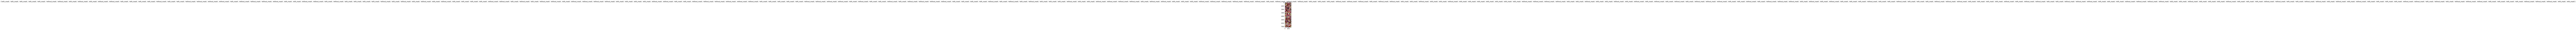

In [8]:
inputs, classes = next(iter(dataloaders["Train"]))
out = torchvision.utils.make_grid(inputs)
img_show(out, title=[class_names[x] for x in classes])

In [9]:
torchvision.models.list_models()

['alexnet',
 'convnext_base',
 'convnext_large',
 'convnext_small',
 'convnext_tiny',
 'deeplabv3_mobilenet_v3_large',
 'deeplabv3_resnet101',
 'deeplabv3_resnet50',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'efficientnet_b0',
 'efficientnet_b1',
 'efficientnet_b2',
 'efficientnet_b3',
 'efficientnet_b4',
 'efficientnet_b5',
 'efficientnet_b6',
 'efficientnet_b7',
 'efficientnet_v2_l',
 'efficientnet_v2_m',
 'efficientnet_v2_s',
 'fasterrcnn_mobilenet_v3_large_320_fpn',
 'fasterrcnn_mobilenet_v3_large_fpn',
 'fasterrcnn_resnet50_fpn',
 'fasterrcnn_resnet50_fpn_v2',
 'fcn_resnet101',
 'fcn_resnet50',
 'fcos_resnet50_fpn',
 'googlenet',
 'inception_v3',
 'keypointrcnn_resnet50_fpn',
 'lraspp_mobilenet_v3_large',
 'maskrcnn_resnet50_fpn',
 'maskrcnn_resnet50_fpn_v2',
 'maxvit_t',
 'mc3_18',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet_v2',
 'mobilenet_v3_large',
 'mobilenet_v3_small',
 'mvit_v1_b',
 'mvit_v2_s',
 'quantized_googlenet',
 '

试一下resnet18

In [10]:
model_fit_ = torchvision.models.resnet18()
model_fit_

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [11]:
# 使用out layer以前训练好的层
feature_extract = True

In [12]:
def set_parameter_requires_grad(input_model, feature_extracting):
    if feature_extracting:
        for param in input_model.parameters():
            param.requires_grad = False

In [13]:
def initialize_resnet18(extract_feature, num_out):
    model_ft = torchvision.models.resnet18(weights=torchvision.models.ResNet18_Weights.IMAGENET1K_V1)
    set_parameter_requires_grad(model_ft, extract_feature)
    num_features = model_ft.fc.in_features
    model_ft.fc = nn.Linear(num_features, num_out)
    return model_ft

In [14]:
model_ft = initialize_resnet18(True,2)
model_ft

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [15]:

print("需要学习调整的参数:")

if feature_extract:
    params_to_update = []
    for name, param in model_ft.named_parameters():
        if param.requires_grad:
            params_to_update.append(param)
            print("\t", name)

else:
    for name, param in model_ft.named_parameters():
        if param.requires_grad:
            print("\t", name)


需要学习调整的参数:
	 fc.weight
	 fc.bias


优化器

In [16]:
optimizer_ft = optim.Adam(model_ft.parameters(), lr=0.0001)
criterion = nn.NLLLoss()

训练

In [17]:
loss_fn = nn.CrossEntropyLoss()
# loss_fn = nn.NLLLoss()

In [18]:
print(dataloaders["Train"])

In [19]:
for inputs, classes in dataloaders["Train"]:
    print(inputs)
    print("classes", classes)


tensor([[[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          ...,
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

         [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          ...,
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

         [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
          [-1.8044, -1.8044, -

tensor([[[[-2.0494, -2.0494, -2.0494,  ..., -2.0494, -2.0494, -2.0494],
          [-2.0494, -2.0494, -2.0494,  ..., -2.0494, -2.0494, -2.0494],
          [-2.0494, -2.0494, -2.0494,  ..., -2.0494, -2.0494, -2.0494],
          ...,
          [-2.0494, -2.0494, -2.0494,  ..., -2.0494, -2.0494, -2.0494],
          [-2.0494, -2.0494, -2.0494,  ..., -2.0494, -2.0494, -2.0494],
          [-2.0494, -2.0494, -2.0494,  ..., -2.0494, -2.0494, -2.0494]],

         [[-1.9657, -1.9657, -1.9657,  ..., -1.9657, -1.9657, -1.9657],
          [-1.9657, -1.9657, -1.9657,  ..., -1.9657, -1.9657, -1.9657],
          [-1.9657, -1.9657, -1.9657,  ..., -1.9657, -1.9657, -1.9657],
          ...,
          [-1.9657, -1.9657, -1.9657,  ..., -1.9657, -1.9657, -1.9657],
          [-1.9657, -1.9657, -1.9657,  ..., -1.9657, -1.9657, -1.9657],
          [-1.9657, -1.9657, -1.9657,  ..., -1.9657, -1.9657, -1.9657]],

         [[-1.7347, -1.7347, -1.7347,  ..., -1.7347, -1.7347, -1.7347],
          [-1.7347, -1.7347, -

tensor([[[[-1.9809, -1.9809, -1.9809,  ..., -1.9809, -1.9809, -1.9809],
          [-1.9809, -1.9809, -1.9809,  ..., -1.9809, -1.9809, -1.9809],
          [-1.9809, -1.9809, -1.9809,  ..., -1.9809, -1.9809, -1.9809],
          ...,
          [-1.9809, -1.9809, -1.9809,  ..., -1.9809, -1.9809, -1.9809],
          [-1.9809, -1.9809, -1.9809,  ..., -1.9809, -1.9809, -1.9809],
          [-1.9809, -1.9809, -1.9809,  ..., -1.9809, -1.9809, -1.9809]],

         [[-1.8957, -1.8957, -1.8957,  ..., -1.8957, -1.8957, -1.8957],
          [-1.8957, -1.8957, -1.8957,  ..., -1.8957, -1.8957, -1.8957],
          [-1.8957, -1.8957, -1.8957,  ..., -1.8957, -1.8957, -1.8957],
          ...,
          [-1.8957, -1.8957, -1.8957,  ..., -1.8957, -1.8957, -1.8957],
          [-1.8957, -1.8957, -1.8957,  ..., -1.8957, -1.8957, -1.8957],
          [-1.8957, -1.8957, -1.8957,  ..., -1.8957, -1.8957, -1.8957]],

         [[-1.6650, -1.6650, -1.6650,  ..., -1.6650, -1.6650, -1.6650],
          [-1.6650, -1.6650, -

tensor([[[[-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152],
          [-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152],
          [-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152],
          ...,
          [-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152],
          [-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152],
          [-2.0152, -2.0152, -2.0152,  ..., -2.0152, -2.0152, -2.0152]],

         [[-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307],
          [-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307],
          [-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307],
          ...,
          [-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307],
          [-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307],
          [-1.9307, -1.9307, -1.9307,  ..., -1.9307, -1.9307, -1.9307]],

         [[-1.6999, -1.6999, -1.6999,  ..., -1.6999, -1.6999, -1.6999],
          [-1.6999, -1.6999, -

tensor([[[[-2.0665, -2.0665, -2.0665,  ..., -2.0665, -2.0665, -2.0665],
          [-2.0665, -2.0665, -2.0665,  ..., -2.0665, -2.0665, -2.0665],
          [-2.0665, -2.0665, -2.0665,  ..., -2.0665, -2.0665, -2.0665],
          ...,
          [-2.0665, -2.0665, -2.0665,  ..., -2.0665, -2.0665, -2.0665],
          [-2.0665, -2.0665, -2.0665,  ..., -2.0665, -2.0665, -2.0665],
          [-2.0665, -2.0665, -2.0665,  ..., -2.0665, -2.0665, -2.0665]],

         [[-1.9832, -1.9832, -1.9832,  ..., -1.9832, -1.9832, -1.9832],
          [-1.9832, -1.9832, -1.9832,  ..., -1.9832, -1.9832, -1.9832],
          [-1.9832, -1.9832, -1.9832,  ..., -1.9832, -1.9832, -1.9832],
          ...,
          [-1.9832, -1.9832, -1.9832,  ..., -1.9832, -1.9832, -1.9832],
          [-1.9832, -1.9832, -1.9832,  ..., -1.9832, -1.9832, -1.9832],
          [-1.9832, -1.9832, -1.9832,  ..., -1.9832, -1.9832, -1.9832]],

         [[-1.7522, -1.7522, -1.7522,  ..., -1.7522, -1.7522, -1.7522],
          [-1.7522, -1.7522, -

tensor([[[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          ...,
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

         [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          ...,
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

         [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
          [-1.8044, -1.8044, -

tensor([[[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          ...,
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

         [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          ...,
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

         [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
          [-1.8044, -1.8044, -

tensor([[[[-1.9809, -1.9809, -1.9809,  ..., -1.9809, -1.9809, -1.9809],
          [-1.9809, -1.9809, -1.9809,  ..., -1.9809, -1.9809, -1.9809],
          [-1.9809, -1.9809, -1.9809,  ..., -1.9809, -1.9809, -1.9809],
          ...,
          [-1.9809, -1.9809, -1.9809,  ..., -1.9809, -1.9809, -1.9809],
          [-1.9809, -1.9809, -1.9809,  ..., -1.9809, -1.9809, -1.9809],
          [-1.9809, -1.9809, -1.9809,  ..., -1.9809, -1.9809, -1.9809]],

         [[-1.8957, -1.8957, -1.8957,  ..., -1.8957, -1.8957, -1.8957],
          [-1.8957, -1.8957, -1.8957,  ..., -1.8957, -1.8957, -1.8957],
          [-1.8957, -1.8957, -1.8957,  ..., -1.8957, -1.8957, -1.8957],
          ...,
          [-1.8957, -1.8957, -1.8957,  ..., -1.8957, -1.8957, -1.8957],
          [-1.8957, -1.8957, -1.8957,  ..., -1.8957, -1.8957, -1.8957],
          [-1.8957, -1.8957, -1.8957,  ..., -1.8957, -1.8957, -1.8957]],

         [[-1.6650, -1.6650, -1.6650,  ..., -1.6650, -1.6650, -1.6650],
          [-1.6650, -1.6650, -

In [20]:
for batch, sets in enumerate(dataloaders):
    for i, (inputs, classes) in enumerate(dataloaders["Train"]):
        print("--------",i)
        print(inputs)
        print(classes)

-------- 0
tensor([[[[-1.9809, -1.9809, -1.9809,  ..., -1.9809, -1.9809, -1.9809],
          [-1.9809, -1.9809, -1.9809,  ..., -1.9809, -1.9809, -1.9809],
          [-1.9809, -1.9809, -1.9809,  ..., -1.9809, -1.9809, -1.9809],
          ...,
          [-1.9809, -1.9809, -1.9809,  ..., -1.9809, -1.9809, -1.9809],
          [-1.9809, -1.9809, -1.9809,  ..., -1.9809, -1.9809, -1.9809],
          [-1.9809, -1.9809, -1.9809,  ..., -1.9809, -1.9809, -1.9809]],

         [[-1.8957, -1.8957, -1.8957,  ..., -1.8957, -1.8957, -1.8957],
          [-1.8957, -1.8957, -1.8957,  ..., -1.8957, -1.8957, -1.8957],
          [-1.8957, -1.8957, -1.8957,  ..., -1.8957, -1.8957, -1.8957],
          ...,
          [-1.8957, -1.8957, -1.8957,  ..., -1.8957, -1.8957, -1.8957],
          [-1.8957, -1.8957, -1.8957,  ..., -1.8957, -1.8957, -1.8957],
          [-1.8957, -1.8957, -1.8957,  ..., -1.8957, -1.8957, -1.8957]],

         [[-1.6650, -1.6650, -1.6650,  ..., -1.6650, -1.6650, -1.6650],
          [-1.6650,

-------- 1
tensor([[[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          ...,
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

         [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          ...,
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

         [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
          [-1.8044,

-------- 2
tensor([[[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          ...,
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

         [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          ...,
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

         [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
          [-1.8044,

-------- 3
tensor([[[[-2.1008, -2.1008, -2.1008,  ..., -2.1008, -2.1008, -2.1008],
          [-2.1008, -2.1008, -2.1008,  ..., -2.1008, -2.1008, -2.1008],
          [-2.1008, -2.1008, -2.1008,  ..., -2.1008, -2.1008, -2.1008],
          ...,
          [-2.1008, -2.1008, -2.1008,  ..., -2.1008, -2.1008, -2.1008],
          [-2.1008, -2.1008, -2.1008,  ..., -2.1008, -2.1008, -2.1008],
          [-2.1008, -2.1008, -2.1008,  ..., -2.1008, -2.1008, -2.1008]],

         [[-2.0182, -2.0182, -2.0182,  ..., -2.0182, -2.0182, -2.0182],
          [-2.0182, -2.0182, -2.0182,  ..., -2.0182, -2.0182, -2.0182],
          [-2.0182, -2.0182, -2.0182,  ..., -2.0182, -2.0182, -2.0182],
          ...,
          [-2.0182, -2.0182, -2.0182,  ..., -2.0182, -2.0182, -2.0182],
          [-2.0182, -2.0182, -2.0182,  ..., -2.0182, -2.0182, -2.0182],
          [-2.0182, -2.0182, -2.0182,  ..., -2.0182, -2.0182, -2.0182]],

         [[-1.7870, -1.7870, -1.7870,  ..., -1.7870, -1.7870, -1.7870],
          [-1.7870,

-------- 4
tensor([[[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          ...,
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

         [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          ...,
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

         [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
          [-1.8044,

-------- 5
tensor([[[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          ...,
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

         [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          ...,
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

         [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
          [-1.8044,

-------- 6
tensor([[[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          ...,
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

         [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          ...,
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

         [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
          [-1.8044,

-------- 7
tensor([[[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          ...,
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

         [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          ...,
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

         [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
          [-1.8044,

-------- 0
tensor([[[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          ...,
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

         [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          ...,
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

         [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
          [-1.8044,

-------- 1
tensor([[[[-1.9467, -1.9467, -1.9467,  ..., -1.9467, -1.9467, -1.9467],
          [-1.9467, -1.9467, -1.9467,  ..., -1.9467, -1.9467, -1.9467],
          [-1.9467, -1.9467, -1.9467,  ..., -1.9467, -1.9467, -1.9467],
          ...,
          [-1.9467, -1.9467, -1.9467,  ..., -1.9467, -1.9467, -1.9467],
          [-1.9467, -1.9467, -1.9467,  ..., -1.9467, -1.9467, -1.9467],
          [-1.9467, -1.9467, -1.9467,  ..., -1.9467, -1.9467, -1.9467]],

         [[-1.8606, -1.8606, -1.8606,  ..., -1.8606, -1.8606, -1.8606],
          [-1.8606, -1.8606, -1.8606,  ..., -1.8606, -1.8606, -1.8606],
          [-1.8606, -1.8606, -1.8606,  ..., -1.8606, -1.8606, -1.8606],
          ...,
          [-1.8606, -1.8606, -1.8606,  ..., -1.8606, -1.8606, -1.8606],
          [-1.8606, -1.8606, -1.8606,  ..., -1.8606, -1.8606, -1.8606],
          [-1.8606, -1.8606, -1.8606,  ..., -1.8606, -1.8606, -1.8606]],

         [[-1.6302, -1.6302, -1.6302,  ..., -1.6302, -1.6302, -1.6302],
          [-1.6302,

-------- 2
tensor([[[[-1.9809, -1.9809, -1.9809,  ..., -1.9809, -1.9809, -1.9809],
          [-1.9809, -1.9809, -1.9809,  ..., -1.9809, -1.9809, -1.9809],
          [-1.9809, -1.9809, -1.9809,  ..., -1.9809, -1.9809, -1.9809],
          ...,
          [-1.9809, -1.9809, -1.9809,  ..., -1.9809, -1.9809, -1.9809],
          [-1.9809, -1.9809, -1.9809,  ..., -1.9809, -1.9809, -1.9809],
          [-1.9809, -1.9809, -1.9809,  ..., -1.9809, -1.9809, -1.9809]],

         [[-1.8957, -1.8957, -1.8957,  ..., -1.8957, -1.8957, -1.8957],
          [-1.8957, -1.8957, -1.8957,  ..., -1.8957, -1.8957, -1.8957],
          [-1.8957, -1.8957, -1.8957,  ..., -1.8957, -1.8957, -1.8957],
          ...,
          [-1.8957, -1.8957, -1.8957,  ..., -1.8957, -1.8957, -1.8957],
          [-1.8957, -1.8957, -1.8957,  ..., -1.8957, -1.8957, -1.8957],
          [-1.8957, -1.8957, -1.8957,  ..., -1.8957, -1.8957, -1.8957]],

         [[-1.6650, -1.6650, -1.6650,  ..., -1.6650, -1.6650, -1.6650],
          [-1.6650,

-------- 3
tensor([[[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          ...,
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

         [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          ...,
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

         [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
          [-1.8044,

-------- 4
tensor([[[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          ...,
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

         [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          ...,
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

         [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
          [-1.8044,

-------- 5
tensor([[[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          ...,
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

         [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          ...,
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

         [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
          [-1.8044,

-------- 6
tensor([[[[-1.9638, -1.9638, -1.9638,  ..., -1.9638, -1.9638, -1.9638],
          [-1.9638, -1.9638, -1.9638,  ..., -1.9638, -1.9638, -1.9638],
          [-1.9638, -1.9638, -1.9638,  ..., -1.9638, -1.9638, -1.9638],
          ...,
          [-1.9638, -1.9638, -1.9638,  ..., -1.9638, -1.9638, -1.9638],
          [-1.9638, -1.9638, -1.9638,  ..., -1.9638, -1.9638, -1.9638],
          [-1.9638, -1.9638, -1.9638,  ..., -1.9638, -1.9638, -1.9638]],

         [[-1.8782, -1.8782, -1.8782,  ..., -1.8782, -1.8782, -1.8782],
          [-1.8782, -1.8782, -1.8782,  ..., -1.8782, -1.8782, -1.8782],
          [-1.8782, -1.8782, -1.8782,  ..., -1.8782, -1.8782, -1.8782],
          ...,
          [-1.8782, -1.8782, -1.8782,  ..., -1.8782, -1.8782, -1.8782],
          [-1.8782, -1.8782, -1.8782,  ..., -1.8782, -1.8782, -1.8782],
          [-1.8782, -1.8782, -1.8782,  ..., -1.8782, -1.8782, -1.8782]],

         [[-1.6476, -1.6476, -1.6476,  ..., -1.6476, -1.6476, -1.6476],
          [-1.6476,

-------- 7
tensor([[[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          ...,
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

         [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          ...,
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

         [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
          [-1.8044,

In [21]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        pred = model(X)
        _, out_pred = torch.max(model(X), 1)

        loss = loss_fn(pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch % 2 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

            # 看一下，以后再删
            # print("predict", out_pred)
            # print("target", y)

def test_loop(dataloader, model, loss_fn, acc_list, loss_list):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    acc_list.append(correct*100)
    loss_list.append(test_loss)
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [22]:
def draw_acc_result(acc, epoch_time):
    y = np.array(acc)
    x = np.array(epoch_time)
    plt.plot(x, y)

    plt.title('Accuracy Epoch Line Chart')
    plt.ylabel('y-accuracy')
    plt.xlabel('x-epoch')
    plt.show()
def draw_loss_result(loss, epoch_time):
    y = np.array(loss)
    x = np.array(epoch_time)
    plt.plot(x, y)

    plt.title('Loss Epoch Line Chart')
    plt.ylabel('y-loss')
    plt.xlabel('x-epoch')
    plt.show()

训练入口在这里

Start on CPU
Epoch 1
-------------------------------
loss: 0.815746  [    0/ 2000]
loss: 0.749223  [  512/ 2000]
loss: 0.736125  [ 1024/ 2000]
loss: 0.738366  [ 1536/ 2000]
Test Error: 
 Accuracy: 52.5%, Avg loss: 0.719453 

Epoch 2
-------------------------------
loss: 0.730660  [    0/ 2000]
loss: 0.699045  [  512/ 2000]
loss: 0.707880  [ 1024/ 2000]
loss: 0.700060  [ 1536/ 2000]
Test Error: 
 Accuracy: 52.0%, Avg loss: 0.730689 

Epoch 3
-------------------------------
loss: 0.689623  [    0/ 2000]
loss: 0.653360  [  512/ 2000]
loss: 0.675916  [ 1024/ 2000]
loss: 0.681244  [ 1536/ 2000]
Test Error: 
 Accuracy: 56.5%, Avg loss: 0.707496 

Epoch 4
-------------------------------
loss: 0.655366  [    0/ 2000]
loss: 0.651405  [  512/ 2000]
loss: 0.605620  [ 1024/ 2000]
loss: 0.639170  [ 1536/ 2000]
Test Error: 
 Accuracy: 57.5%, Avg loss: 0.686668 

Epoch 5
-------------------------------
loss: 0.621820  [    0/ 2000]
loss: 0.625620  [  512/ 2000]
loss: 0.582072  [ 1024/ 2000]
loss: 0.5

loss: 0.192653  [ 1024/ 2000]
loss: 0.197512  [ 1536/ 2000]
Test Error: 
 Accuracy: 91.0%, Avg loss: 0.392997 

Epoch 40
-------------------------------
loss: 0.191587  [    0/ 2000]
loss: 0.180281  [  512/ 2000]
loss: 0.186632  [ 1024/ 2000]
loss: 0.179510  [ 1536/ 2000]
Test Error: 
 Accuracy: 89.0%, Avg loss: 0.373061 

Epoch 41
-------------------------------
loss: 0.191617  [    0/ 2000]
loss: 0.176227  [  512/ 2000]
loss: 0.193834  [ 1024/ 2000]
loss: 0.182884  [ 1536/ 2000]
Test Error: 
 Accuracy: 90.0%, Avg loss: 0.357907 

Epoch 42
-------------------------------
loss: 0.172707  [    0/ 2000]
loss: 0.185154  [  512/ 2000]
loss: 0.182820  [ 1024/ 2000]
loss: 0.184586  [ 1536/ 2000]
Test Error: 
 Accuracy: 89.5%, Avg loss: 0.364479 

Epoch 43
-------------------------------
loss: 0.181299  [    0/ 2000]
loss: 0.184657  [  512/ 2000]
loss: 0.175872  [ 1024/ 2000]
loss: 0.174135  [ 1536/ 2000]
Test Error: 
 Accuracy: 88.5%, Avg loss: 0.361436 

Epoch 44
---------------------------

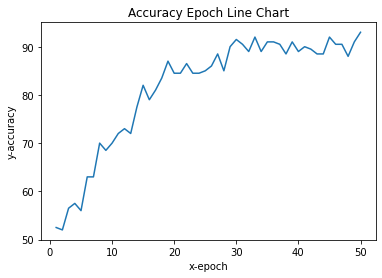

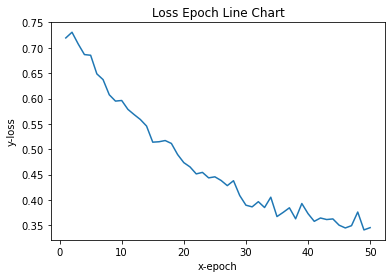

In [23]:
epochs = 50
acc_list = []
loss_list = []
if torch.cuda.is_available():
    print("Start on GPU")
else:
    print("Start on CPU")
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(dataloaders["Train"], model_ft, loss_fn, optimizer_ft)
    test_loop(dataloaders["Test"], model_ft, loss_fn, acc_list, loss_list)
print("Done!")
draw_acc_result(acc_list, [i for i in range(1, len(acc_list)+1)])
draw_loss_result(loss_list, [i for i in range(1, len(loss_list)+1)])

后面的不用管了

In [24]:
acc_ = [68.0, 76.0, 81.0, 86.0, 79.0, 81.0, 84.0, 79.0, 85.0, 78.0, 82.0, 81.0, 87.0, 78.0, 82.0, 88.0, 86.0, 84.0, 86.0, 89.0, 91.0, 86.0, 83.0, 85.0, 81.0, 87.0, 87.0, 82.0, 88.0, 84.0, 85.0, 87.0, 87.0, 87.0, 87.0, 87.0, 92.0, 84.0, 90.0, 90.0, 88.0, 83.0, 86.0, 83.0, 84.0, 82.0, 89.0, 81.0, 92.0, 91.0]
epoch_ = [i for i in range(1, 51)]
loss_ = [0.614288, 0.557294, 0.487522, 0.457194, 0.488358, 0.435121, 0.383316, 0.467714, 0.406804, 0.456730, 0.426332, 0.433169, 0.369941, 0.486823, 0.397050, 0.340567, 0.354762, 0.371264, 0.376313, 0.313482, 0.323789, 0.341476, 0.321718, 0.380739, 0.398366, 0.373900, 0.312948, 0.385505, 0.318215, 0.344609, 0.361870, 0.359009, 0.351973, 0.338048, 0.316605, 0.327947, 0.265936, 0.327100, 0.270373, 0.284021, 0.303596, 0.365134, 0.355562, 0.389704, 0.334369, 0.415306, 0.312101, 0.382107, 0.291153, 0.263090]

In [25]:
def draw_acc_result(acc, epoch_time):
    y = np.array(acc)
    x = np.array(epoch_time)
    plt.plot(x, y)

    plt.title('Accuracy Epoch Line Chart')
    plt.ylabel('y-accuracy')
    plt.xlabel('x-epoch')
    plt.show()

In [26]:
def draw_loss_result(loss, epoch_time):
    y = np.array(loss)
    x = np.array(epoch_time)
    plt.plot(x, y)

    plt.title('Loss Epoch Line Chart')
    plt.ylabel('y-loss')
    plt.xlabel('x-epoch')
    plt.show()

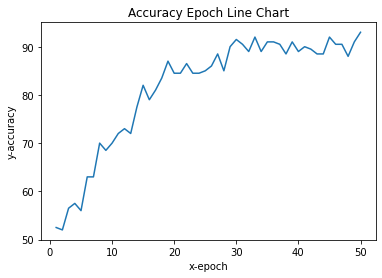

In [27]:
draw_acc_result(acc_list, [i for i in range(1, len(acc_list)+1)])

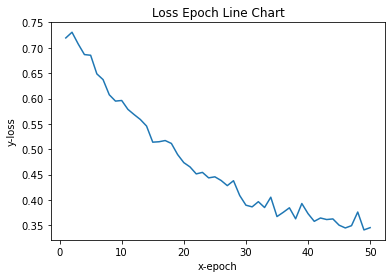

In [28]:
draw_loss_result(loss_list, [i for i in range(1, len(loss_list)+1)])